In [37]:
import pandas as pd
import numpy as np
import env
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import wrangle
import warnings
import explore
from sklearn.metrics import confusion_matrix
import scipy.stats as stats
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('zillow_data.csv')
df = wrangle.preparing_data_zillow(df)
target = df['taxvaluedollarcnt']
df = df.drop(columns =['Unnamed: 0', 'propertylandusedesc'])
train, validate, test = wrangle.split_data(df, target)

In [12]:
train_subset = train.head(100)
train_subset


bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  \
1268902         4.0          2.0                          2235   
613034          3.0          2.5                          1975   
2040503         4.0          2.0                          1796   
2045869         3.0          2.5                          2607   
744180          4.0          2.0                          1792   
...             ...          ...                           ...   
1697483         1.0          1.0                           879   
1675006         2.0          1.0                          1142   
2036951         3.0          2.0                          1260   
850522          4.0          3.0                          2459   
960729          3.0          2.0                          1610   

         taxvaluedollarcnt  yearbuilt  taxamount  fips  
1268902           377671.0       1977    4175.02  6059  
613034            687000.0       1967    7097.42  6059  
2040503           625494.0       1963   11386.63  6037  
2045869           557360.0       2000    6353.84  6111  
744180            205082.0       1957    2579.19  6037  
...                    ...        ...        ...   ...  
1697483           168768.0       1934    2696.10  6037  
1675006            46755.0       1949     897.02  6037  
2036951           143500.0       1955    2480.24  6037  
850522            989131.0       2012   14525.42  6059  
960729            178857.0       1992    2134.44  6037  

[100 rows x 7 columns]

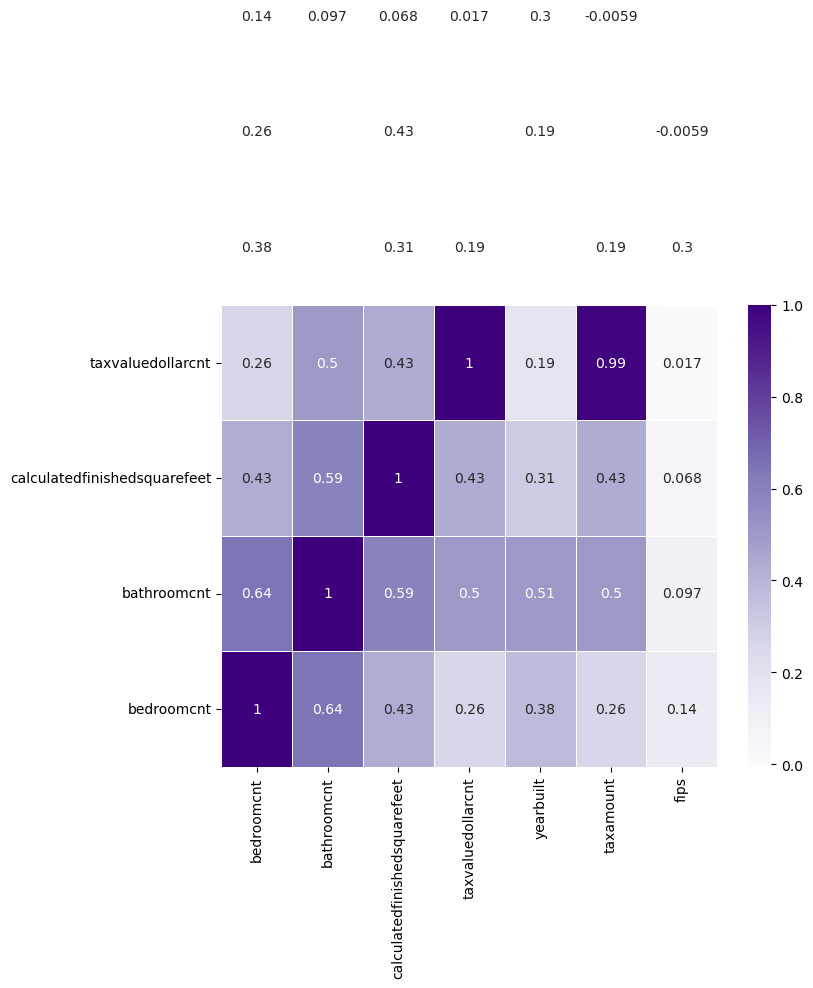

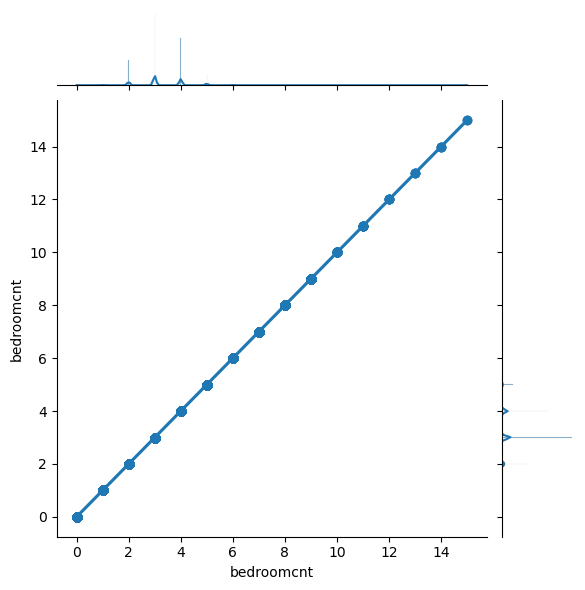

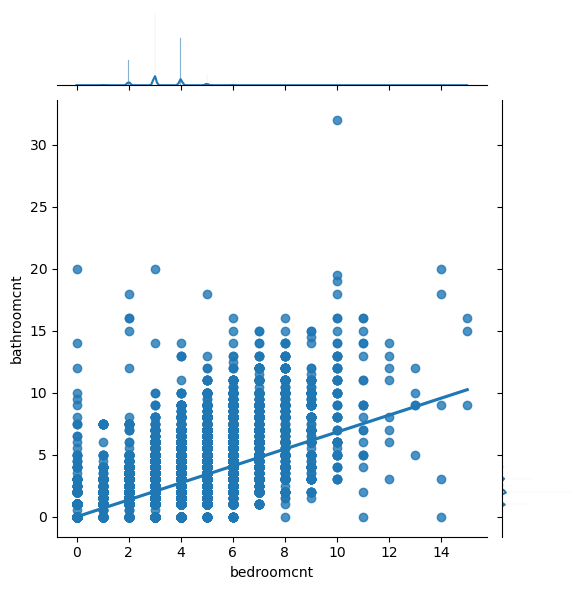

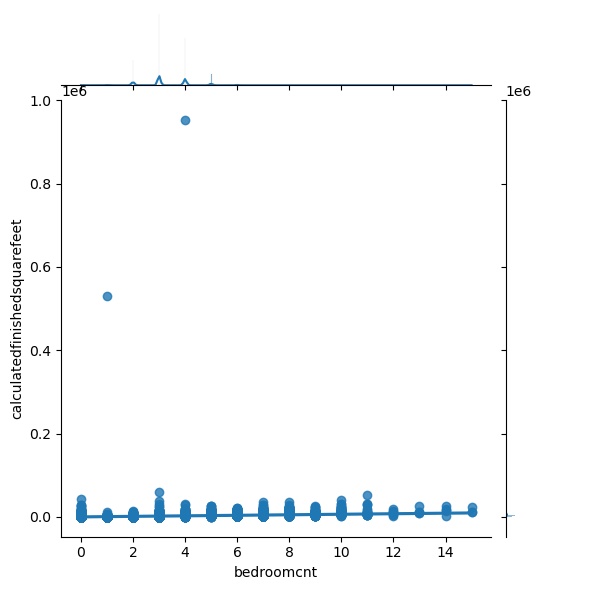

KeyboardInterrupt: 

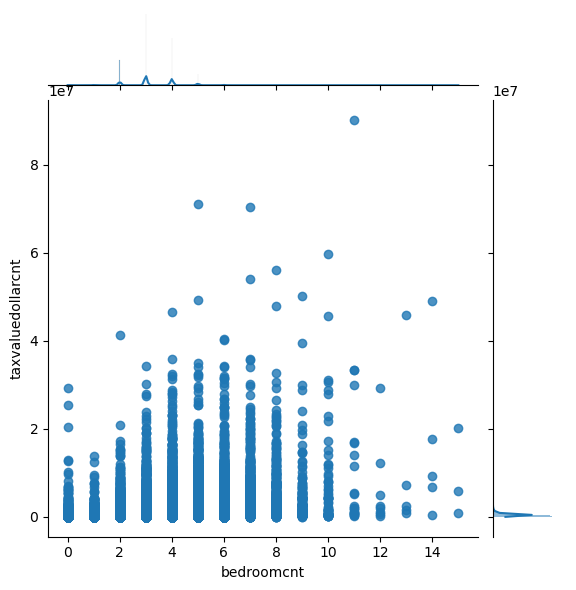

In [70]:
def plot_variable_pairs(train_subset):
    corr_train = train_subset.corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(corr_train, cmap='Purples', annot=True, linewidth = .5)
    plt.ylim(0,4)
    plt.show()
    for row, i in enumerate(train_subset.columns):
        for count, j in enumerate(train_subset.columns):
            sns.jointplot(x=train_subset[i],y=train_subset[j],data = train_subset, kind='reg')
            plt.show()
    
plot_variable_pairs(train)


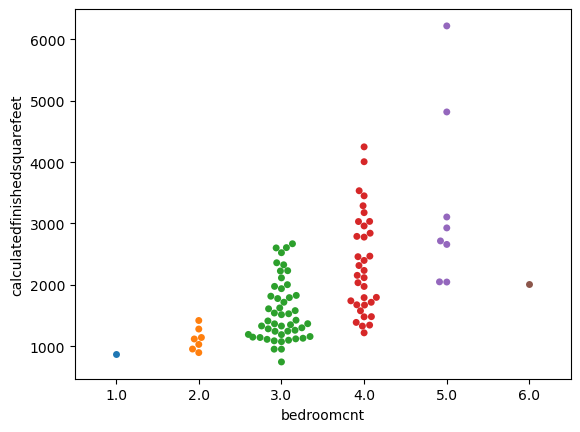

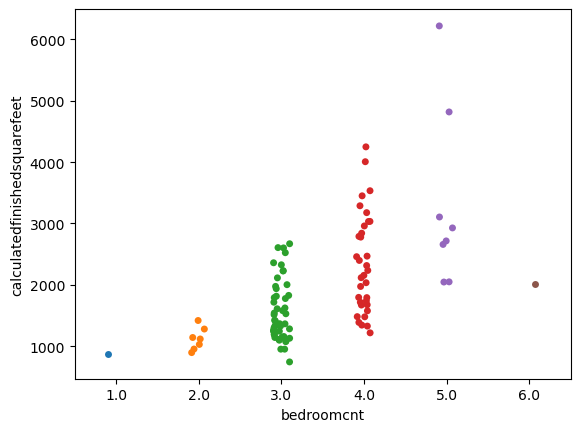

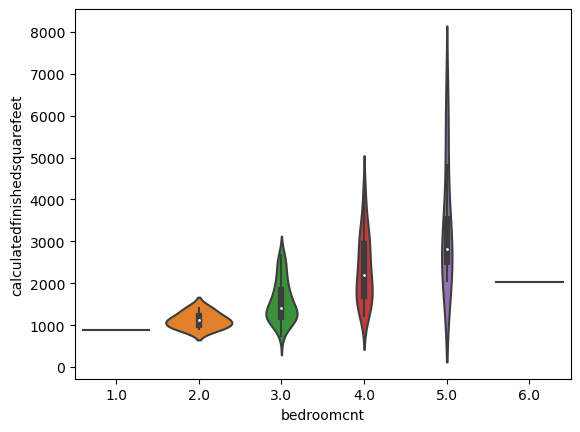

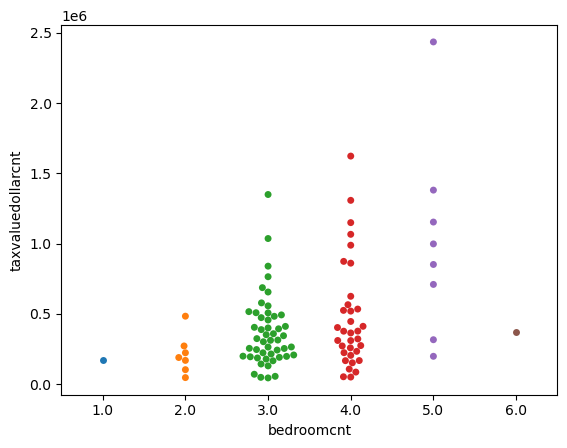

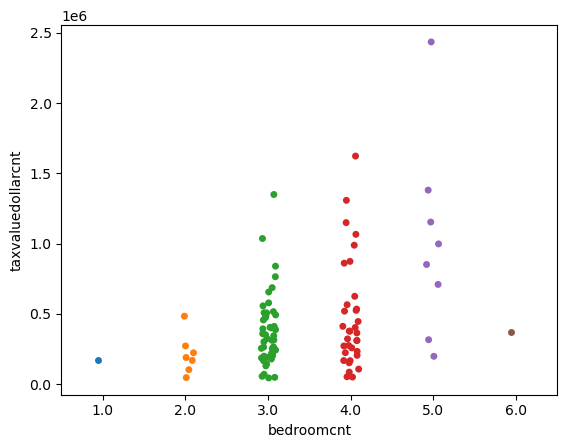

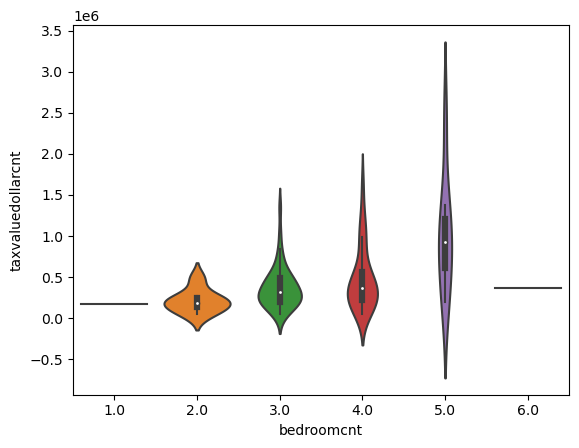

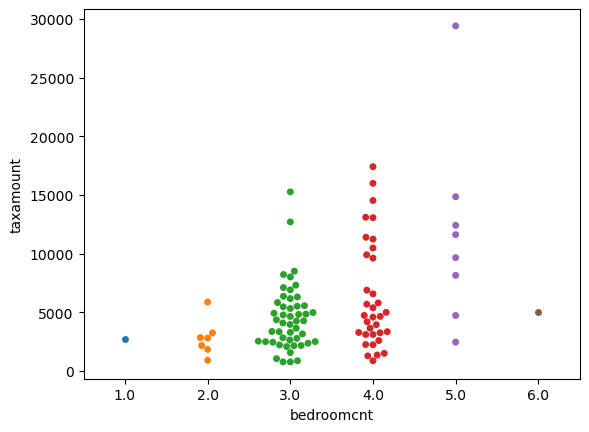

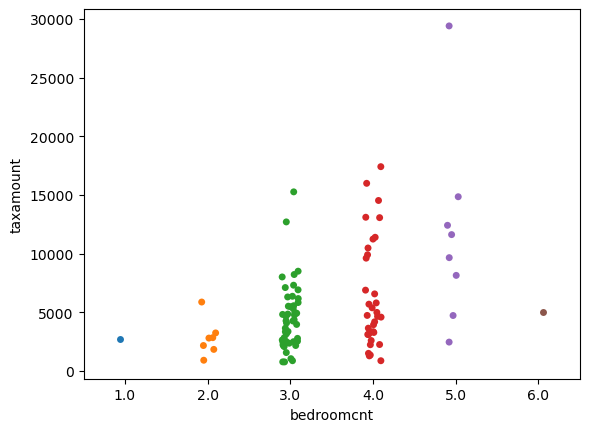

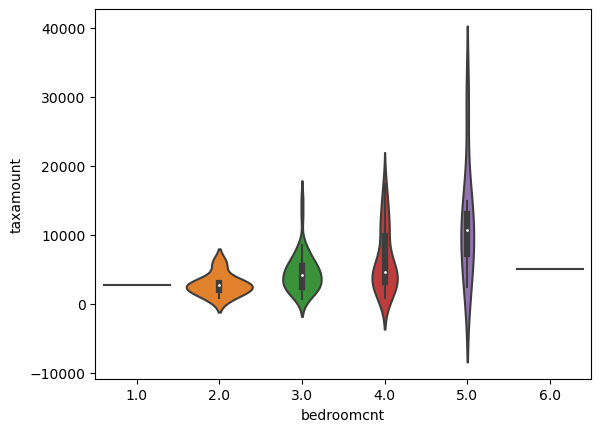

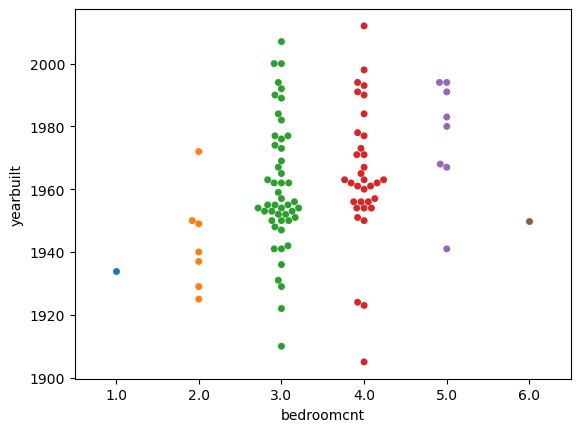

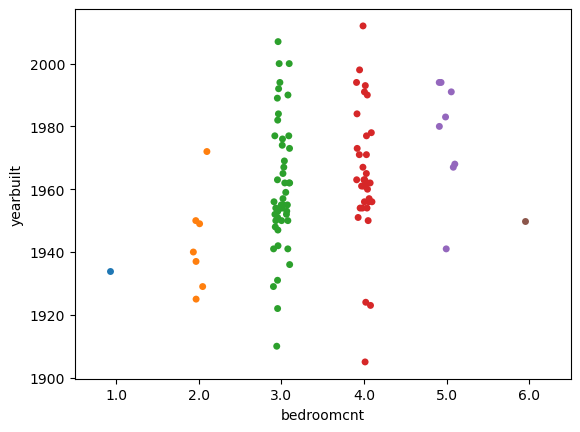

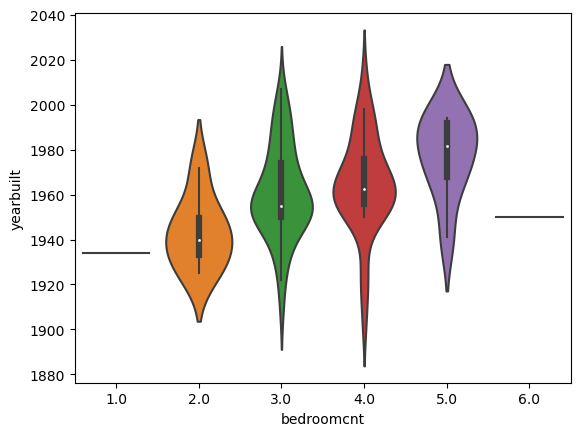

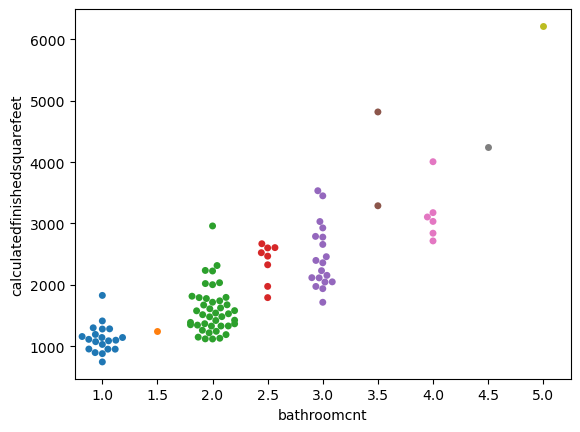

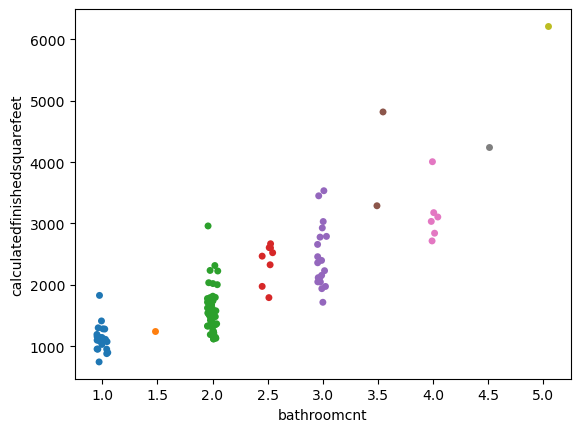

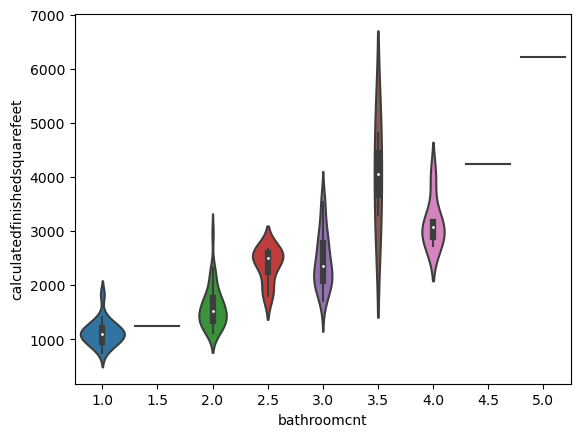

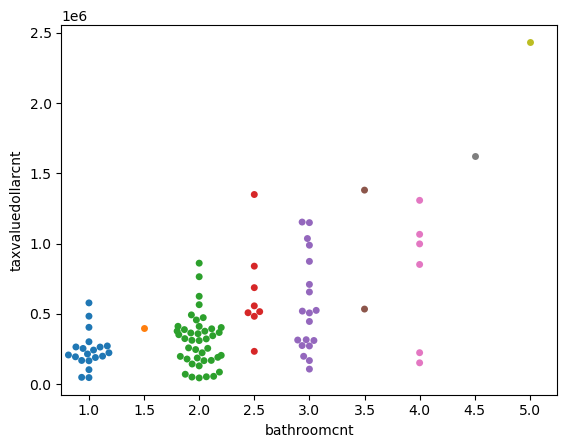

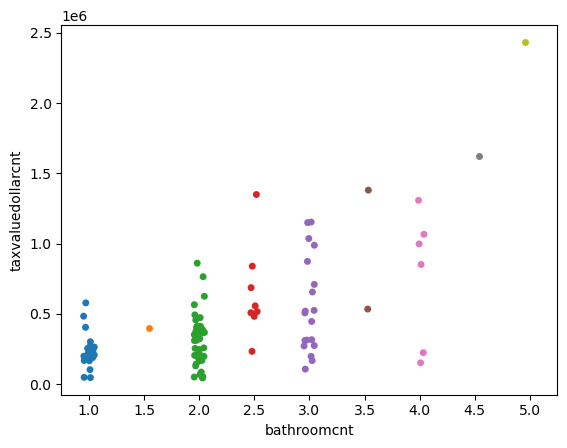

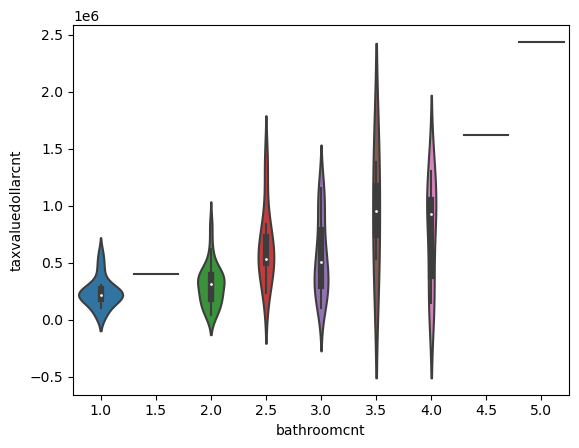

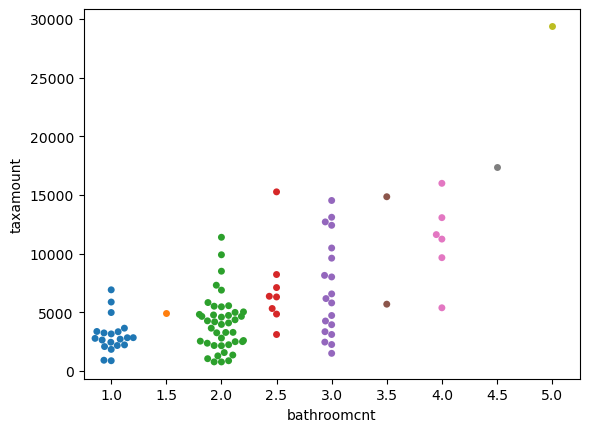

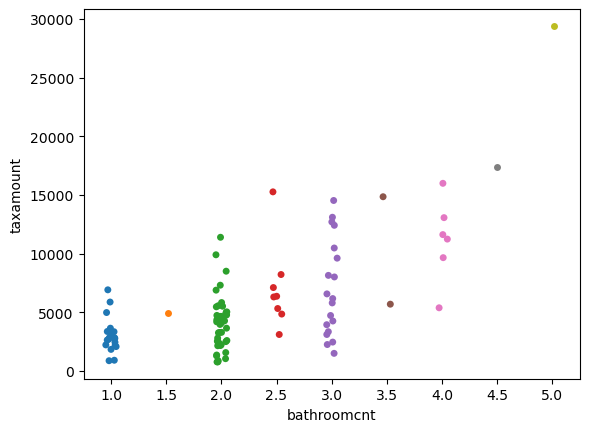

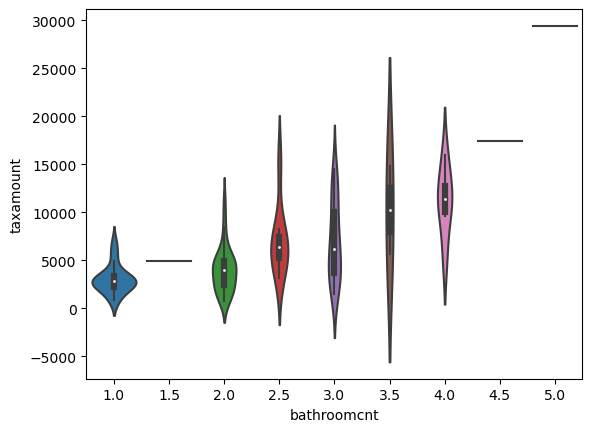

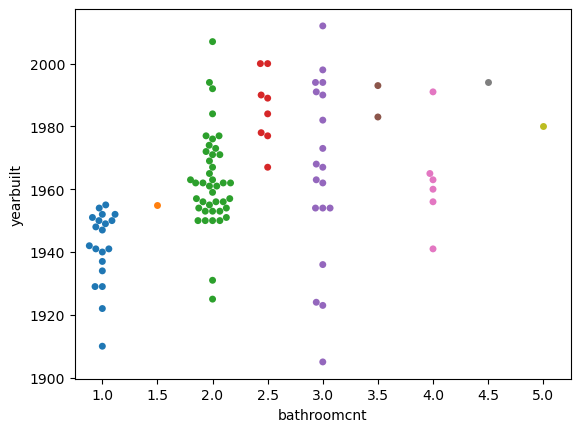

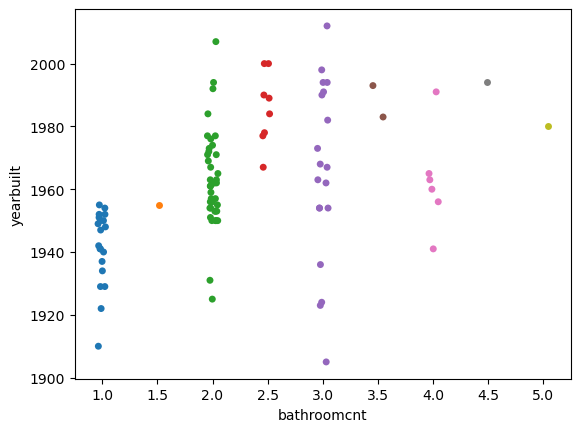

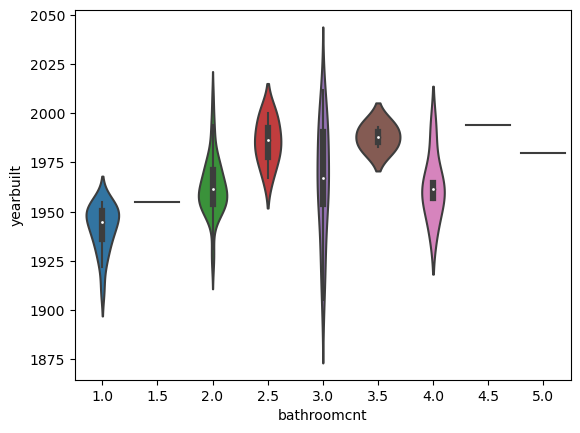

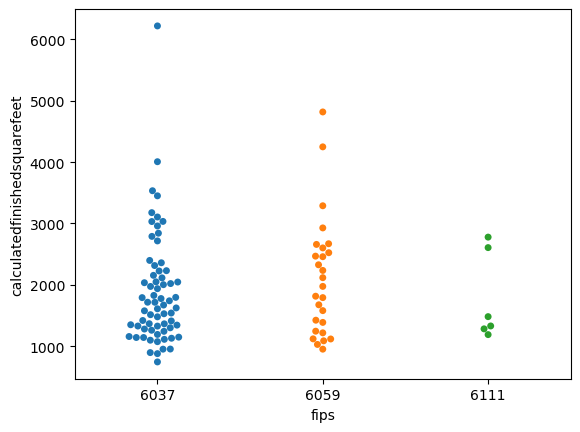

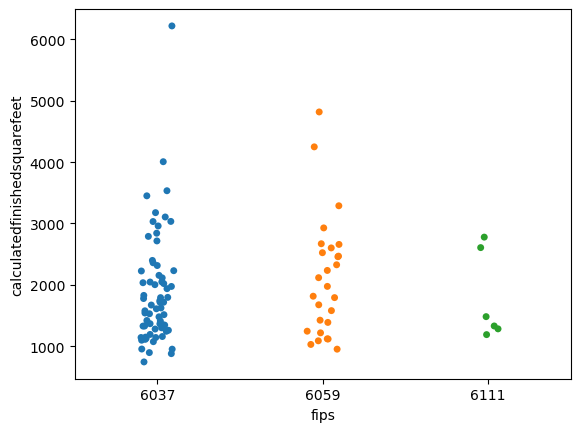

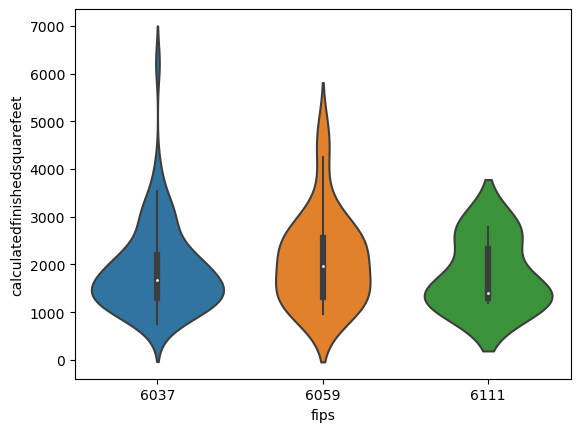

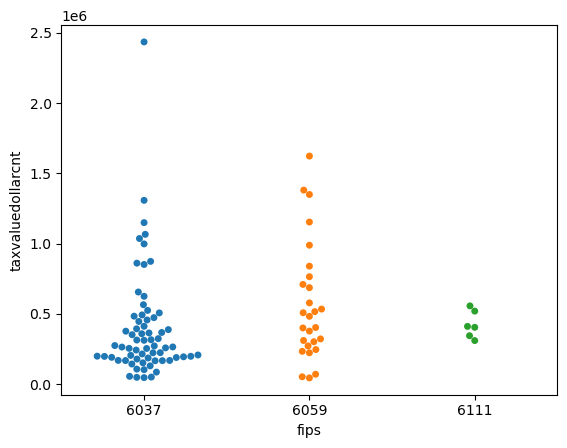

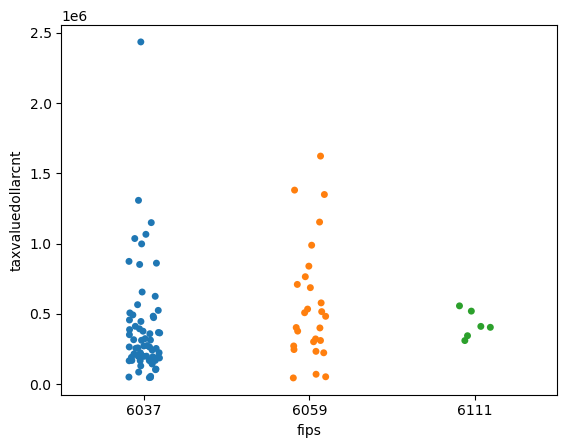

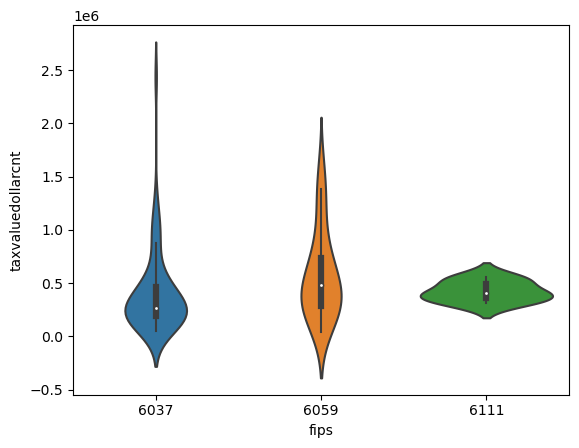

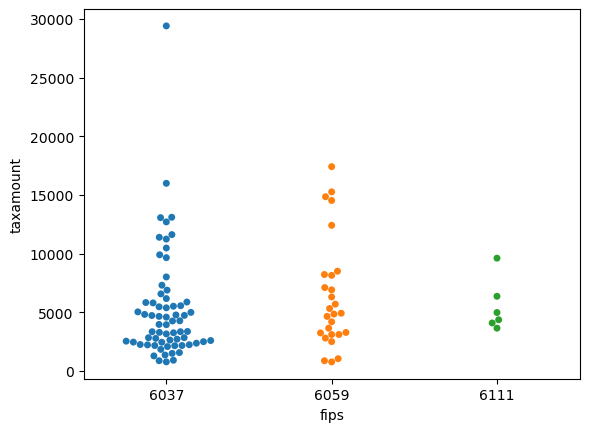

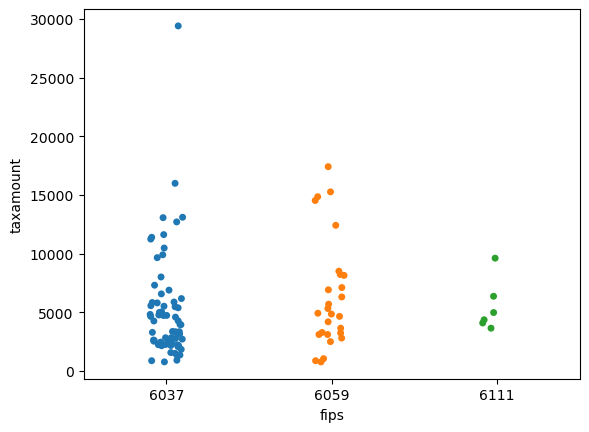

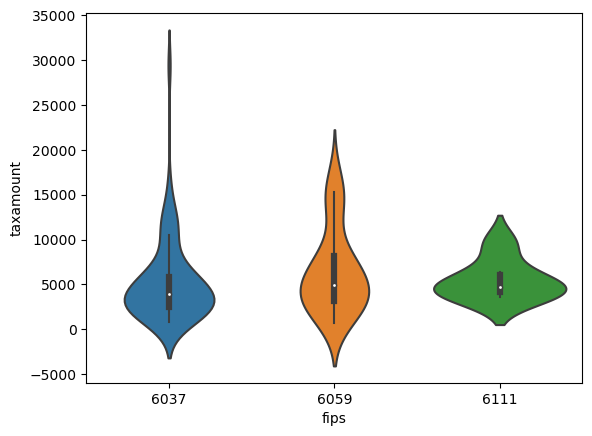

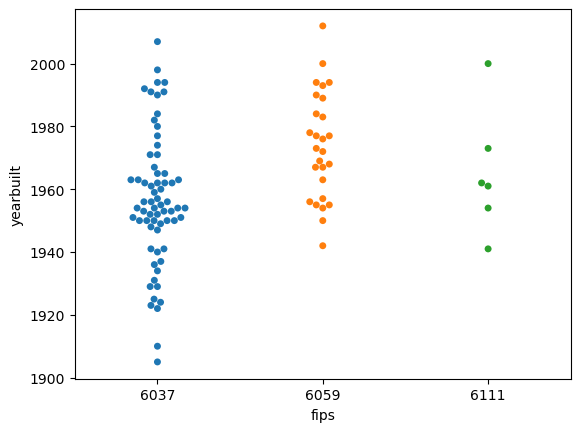

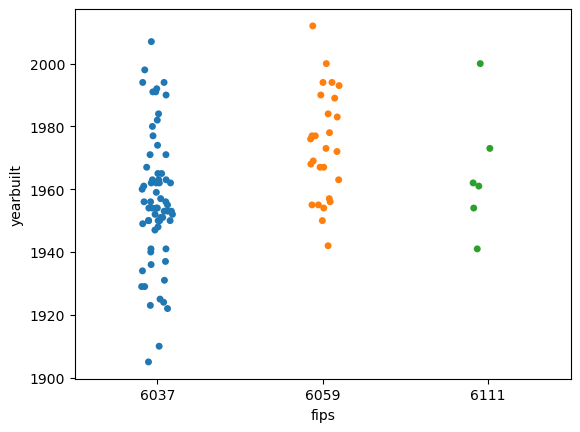

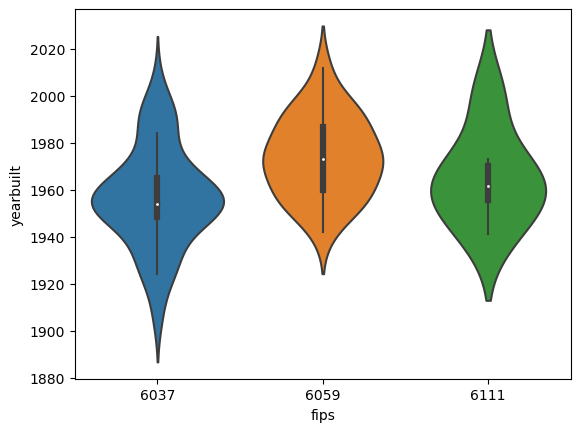

In [34]:
the_dict = {'continuous':['calculatedfinishedsquarefeet','taxvaluedollarcnt','taxamount','yearbuilt'],
           'catagorical':['bedroomcnt','bathroomcnt','fips']}
def plot_categorical_and_continuous_vars(train_subset,the_dict):
   
    for i in range(len(the_dict['catagorical'])):
        for j in range(len(the_dict['continuous'])):
            sns.swarmplot( y=train_subset[the_dict['continuous'][j]], x = train_subset[the_dict['catagorical'][i]], data=train_subset)
            plt.show()
            sns.stripplot(y=train_subset[the_dict['continuous'][j]], x = train_subset[the_dict['catagorical'][i]], data=train_subset)
            plt.show()
            sns.violinplot(y=train_subset[the_dict['continuous'][j]], x = train_subset[the_dict['catagorical'][i]], data=train_subset)
            plt.show()
    
plot_categorical_and_continuous_vars(train_subset,the_dict)

In [ ]:
explore.plot_variable_pairs(train_subset)

In [ ]:
explore.plot_categorical_and_continuous_vars(train_subset, the_dict)

# Come up with some initial hypotheses based on your goal of predicting property value.

null: column is dependent on target
alternate: column is independent of target

H0: Mean of = Mean of 
<br>
Ha: Mean of  != Mean 

7.706026013334829e-90
bedroomcnt is dependent on bedroomcnt 




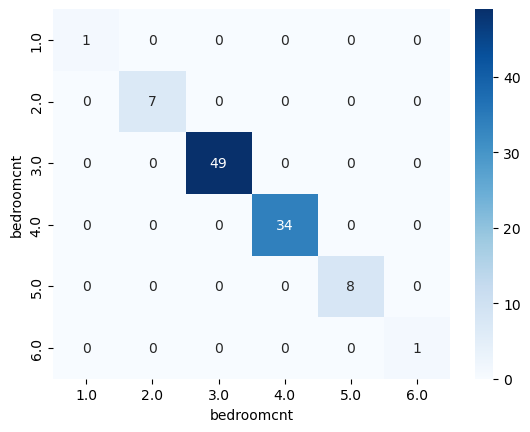

0.0005910069925814148
bedroomcnt is dependent on bathroomcnt 




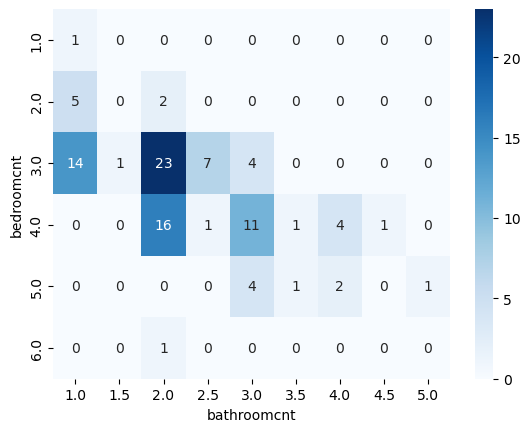

0.9880481360070841
bedroomcnt is dependent on fips 




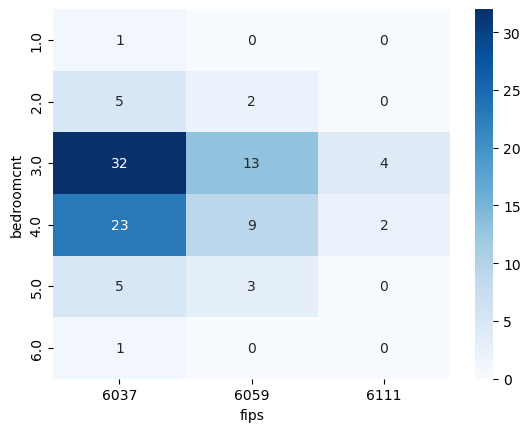

0.0005910069925814192
bathroomcnt is dependent on bedroomcnt 




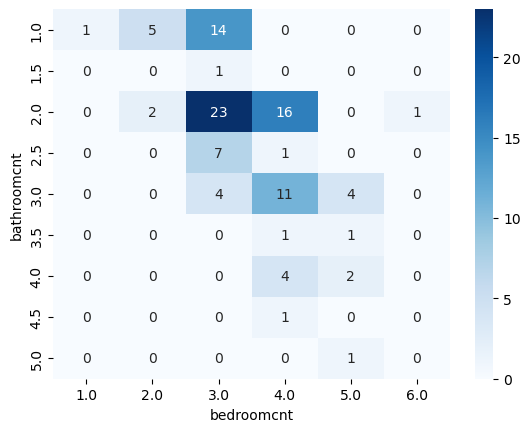

1.164073858622341e-127
bathroomcnt is dependent on bathroomcnt 




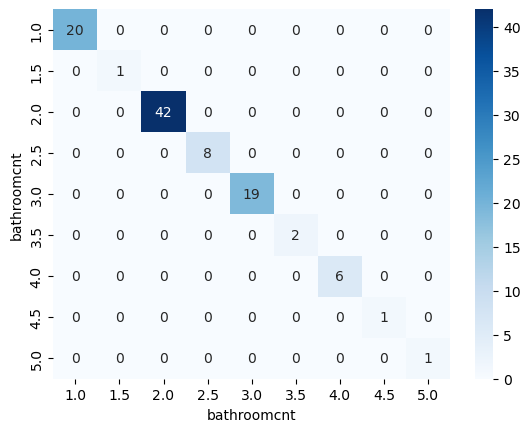

0.005914595426523436
bathroomcnt is dependent on fips 




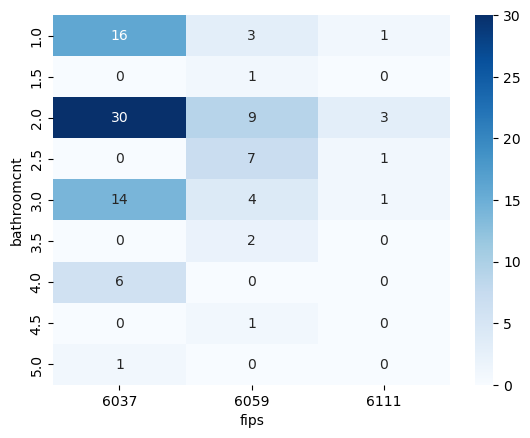

0.0
calculatedfinishedsquarefeet we can trust this correlation value calculatedfinishedsquarefeet 


1.0 0.0
hello


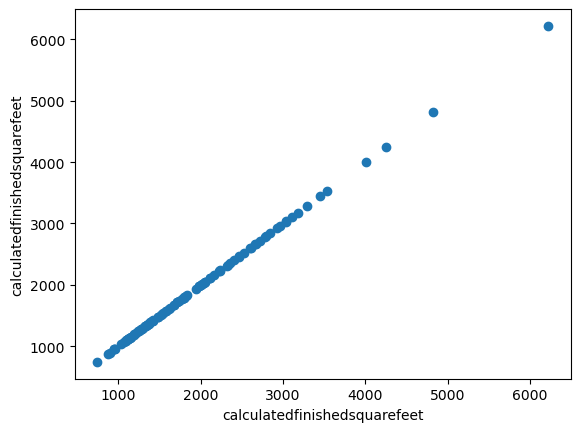

1.3220731847963917e-22
calculatedfinishedsquarefeet we can trust this correlation value taxvaluedollarcnt 


0.7906911043266998 1.3220731847963917e-22
hello


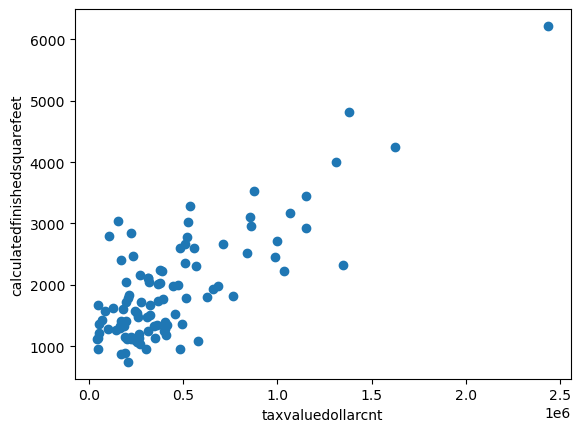

2.3770882046468062e-05
calculatedfinishedsquarefeet we can trust this correlation value yearbuilt 


0.4091103856607101 2.3770882046468062e-05
hello


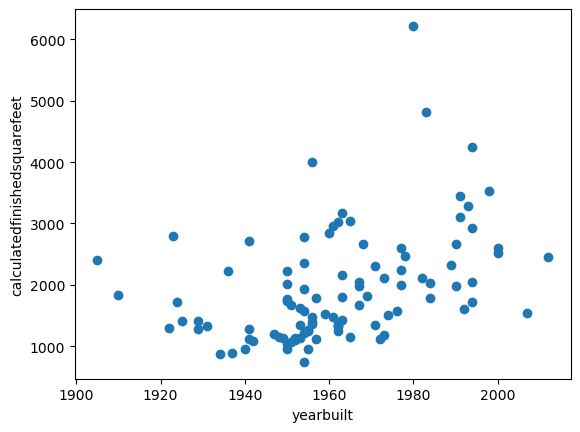

1.3175228045411284e-23
calculatedfinishedsquarefeet we can trust this correlation value taxamount 


0.8014532467255544 1.3175228045411284e-23
hello


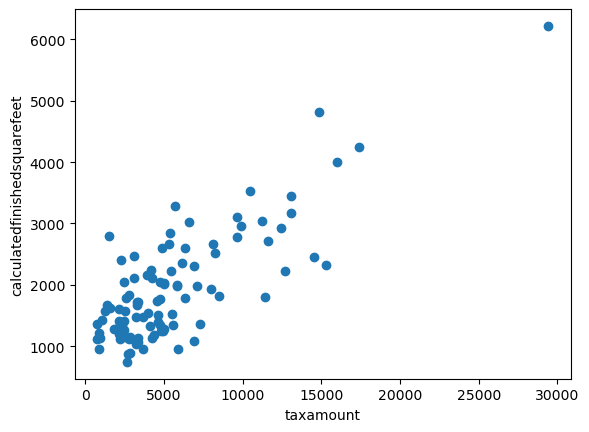

1.3220731847963917e-22
taxvaluedollarcnt we can trust this correlation value calculatedfinishedsquarefeet 


0.7906911043266998 1.3220731847963917e-22
hello


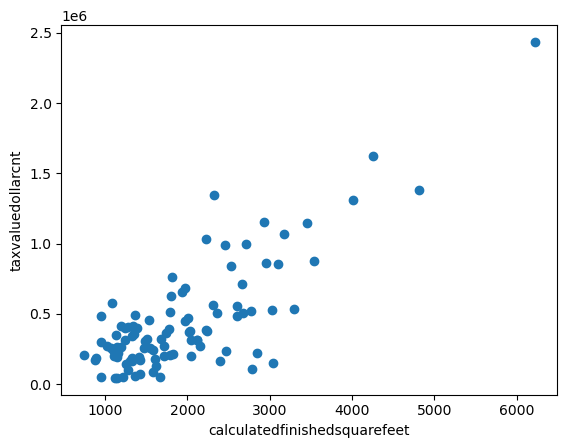

0.0
taxvaluedollarcnt we can trust this correlation value taxvaluedollarcnt 


0.9999999999999998 0.0
hello


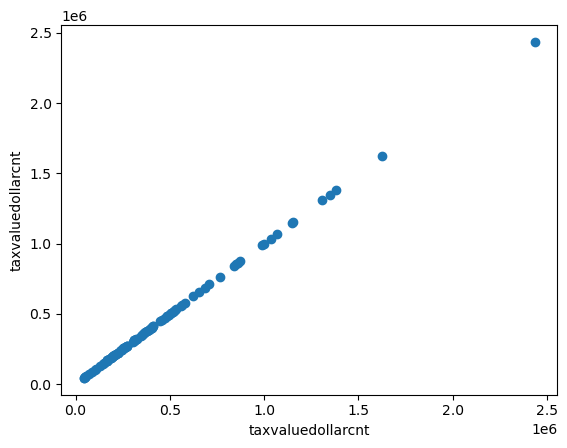

2.6446216959077583e-05
taxvaluedollarcnt we can trust this correlation value yearbuilt 


0.40698531739951777 2.6446216959077583e-05
hello


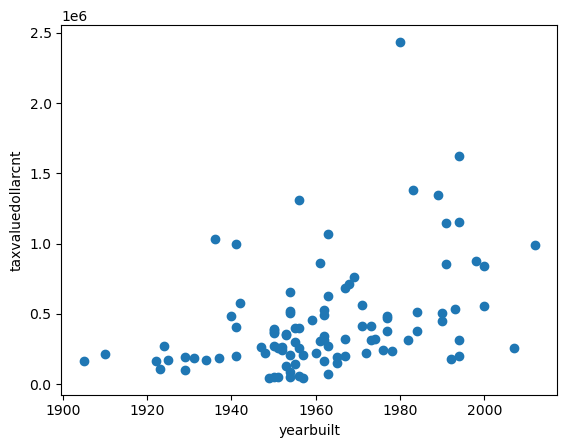

5.570069844832208e-57
taxvaluedollarcnt we can trust this correlation value taxamount 


0.9618678202898281 5.570069844832208e-57
hello


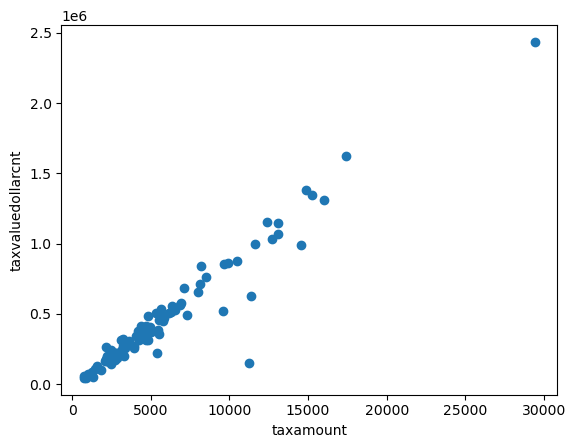

2.3770882046468062e-05
yearbuilt we can trust this correlation value calculatedfinishedsquarefeet 


0.4091103856607101 2.3770882046468062e-05
hello


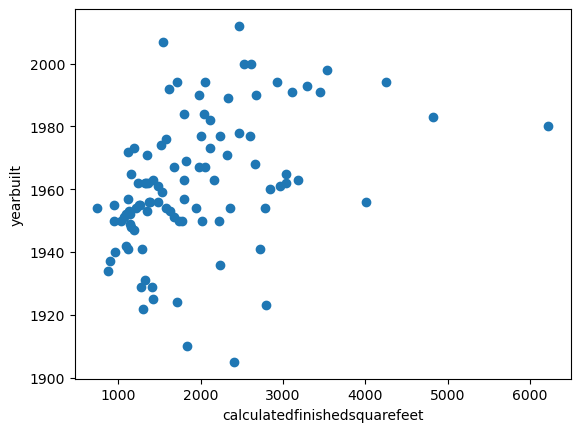

2.6446216959077583e-05
yearbuilt we can trust this correlation value taxvaluedollarcnt 


0.40698531739951777 2.6446216959077583e-05
hello


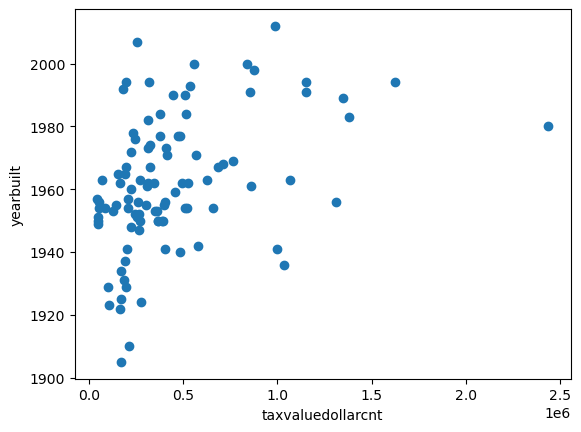

0.0
yearbuilt we can trust this correlation value yearbuilt 


1.0 0.0
hello


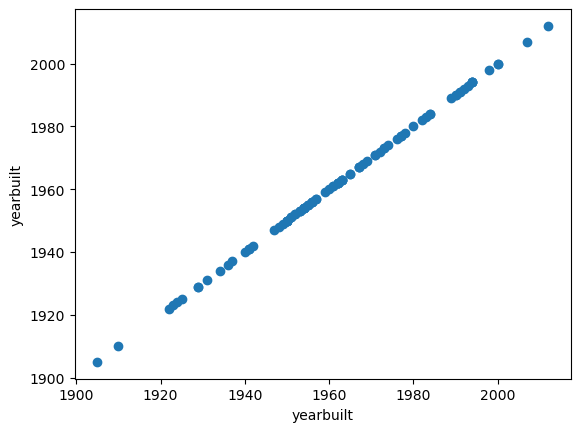

5.58023868015195e-05
yearbuilt we can trust this correlation value taxamount 


0.3916884627535692 5.58023868015195e-05
hello


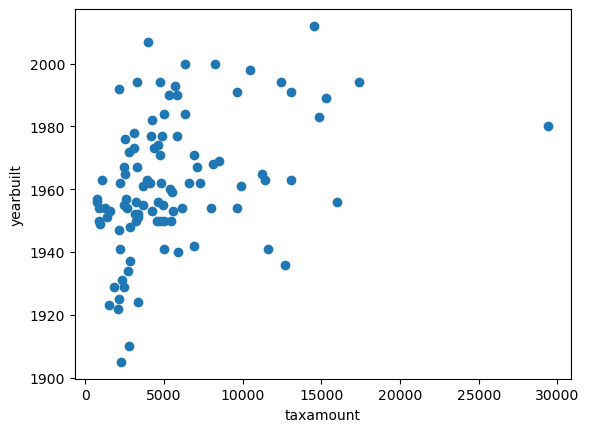

1.3175228045411284e-23
taxamount we can trust this correlation value calculatedfinishedsquarefeet 


0.8014532467255544 1.3175228045411284e-23
hello


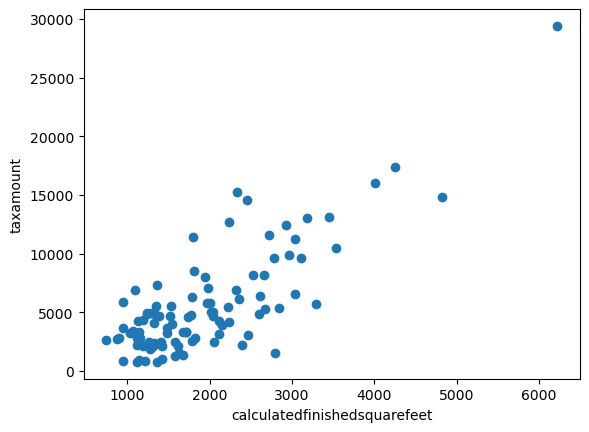

5.570069844832208e-57
taxamount we can trust this correlation value taxvaluedollarcnt 


0.9618678202898281 5.570069844832208e-57
hello


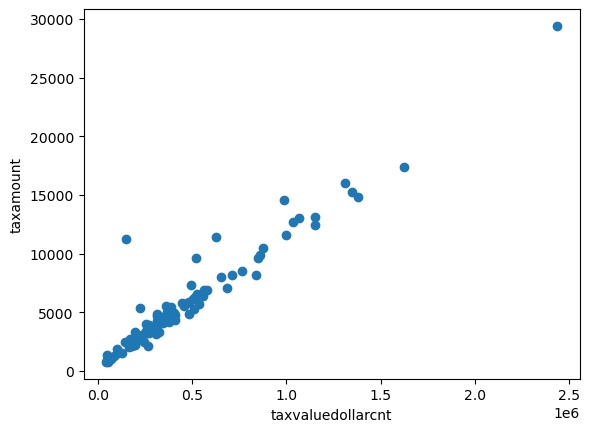

5.58023868015195e-05
taxamount we can trust this correlation value yearbuilt 


0.3916884627535692 5.58023868015195e-05
hello


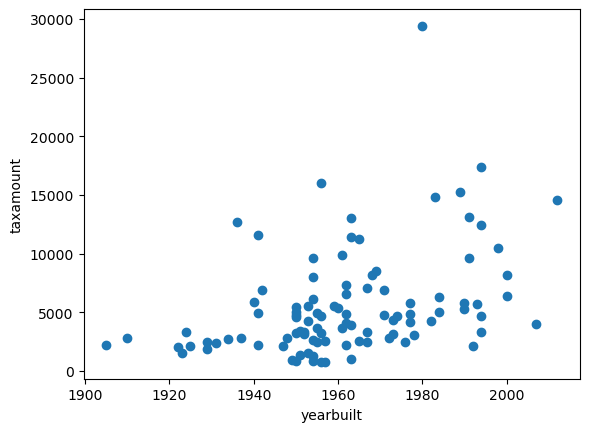

0.0
taxamount we can trust this correlation value taxamount 


0.9999999999999998 0.0
hello


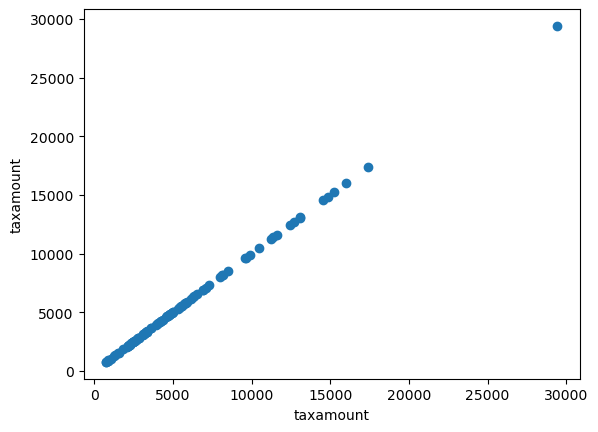

0.9880481360070841
fips is dependent on bedroomcnt 




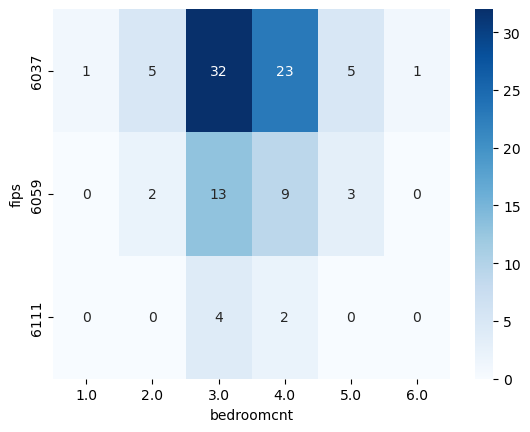

0.005914595426523436
fips is dependent on bathroomcnt 




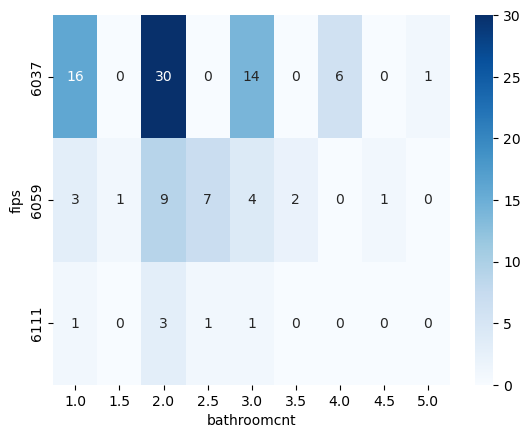

3.75727673578106e-42
fips is dependent on fips 




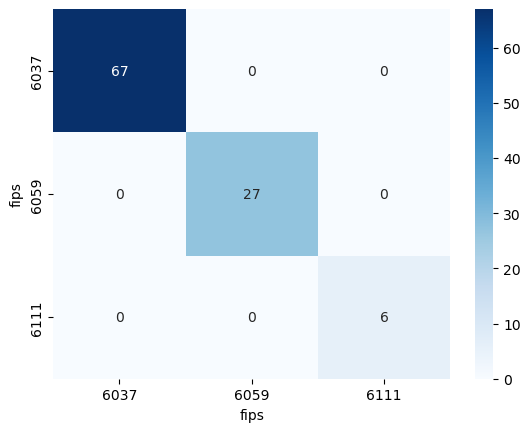

In [59]:
the_dict = {'continuous':['calculatedfinishedsquarefeet','taxvaluedollarcnt','taxamount','yearbuilt'],
           'catagorical':['bedroomcnt','bathroomcnt','fips']}
for i in train_subset.columns:
    for j in train_subset.columns:
        if j in the_dict['catagorical'] and i in the_dict['catagorical']:
            observed = pd.crosstab(train_subset[i], train_subset[j])
            chi2, p, degf, expected = stats.chi2_contingency(observed)
            if p < .05:
                print(p)
                print(i, 'is dependent on', j,'\n\n')

            else:
                print(p)
                print(i, 'is dependent on', j,'\n\n')

            sns.heatmap(observed, annot=True, cmap='Blues')
            plt.show()
        elif j in the_dict['continuous'] and i in the_dict['continuous']:
            corr, p = stats.pearsonr(train_subset[j], train_subset[i])
            if p < .05:
                print(p)
                print(i, 'we can trust this correlation value', j,'\n\n')
            elif p < .05:
                print(p)
                print(i, 'we cannot trust this correlation value', j,'\n\n')
            print(corr, p)
            print('hello')
            plt.scatter(x =train_subset[j], y =train_subset[i])
            plt.xlabel(j)
            plt.ylabel(i)
            plt.show()
            
            

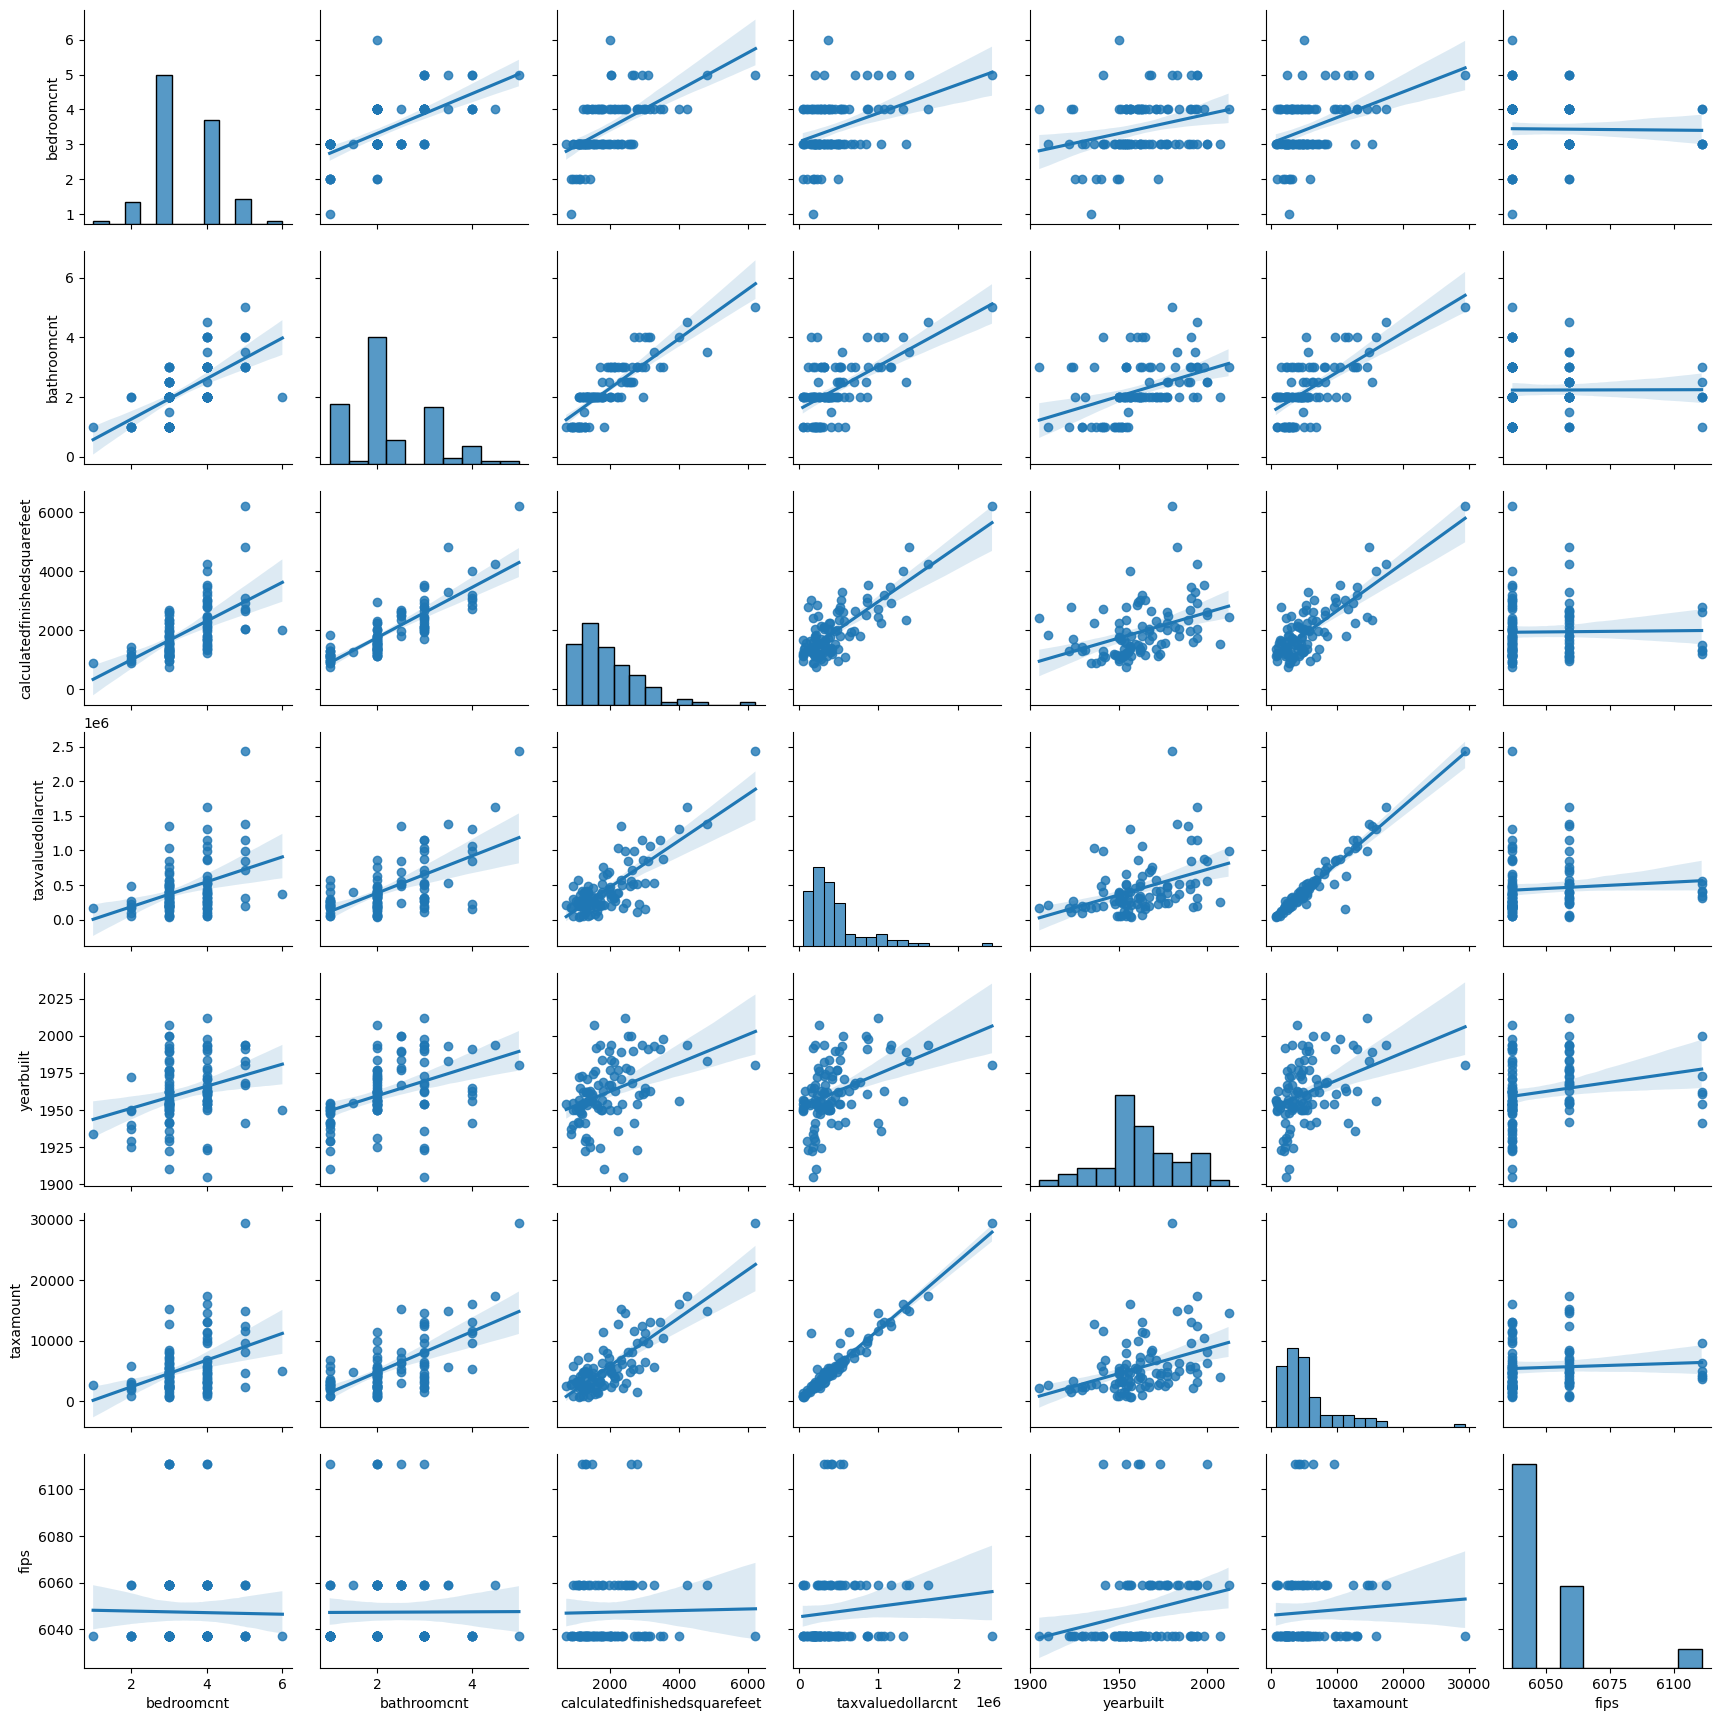

In [68]:
sns.pairplot(train_subset, kind = 'reg')

In [25]:
train_subset.corr()['taxvaluedollarcnt']

bedroomcnt                      0.383746
bathroomcnt                     0.621949
calculatedfinishedsquarefeet    0.790691
taxvaluedollarcnt               1.000000
yearbuilt                       0.406985
taxamount                       0.961868
fips                            0.090595
Name: taxvaluedollarcnt, dtype: float64

In [26]:
train_subset.corr()

bedroomcnt  bathroomcnt  \
bedroomcnt                      1.000000     0.622645   
bathroomcnt                     0.622645     1.000000   
calculatedfinishedsquarefeet    0.594965     0.840659   
taxvaluedollarcnt               0.383746     0.621949   
yearbuilt                       0.287048     0.420664   
taxamount                       0.402622     0.666876   
fips                           -0.014845     0.004337   

                              calculatedfinishedsquarefeet  taxvaluedollarcnt  \
bedroomcnt                                        0.594965           0.383746   
bathroomcnt                                       0.840659           0.621949   
calculatedfinishedsquarefeet                      1.000000           0.790691   
taxvaluedollarcnt                                 0.790691           1.000000   
yearbuilt                                         0.409110           0.406985   
taxamount                                         0.801453           0.961868   
fips                                              0.016402           0.090595   

                              yearbuilt  taxamount      fips  
bedroomcnt                     0.287048   0.402622 -0.014845  
bathroomcnt                    0.420664   0.666876  0.004337  
calculatedfinishedsquarefeet   0.409110   0.801453  0.016402  
taxvaluedollarcnt              0.406985   0.961868  0.090595  
yearbuilt                      1.000000   0.391688  0.218838  
taxamount                      0.391688   1.000000  0.056351  
fips                           0.218838   0.056351  1.000000

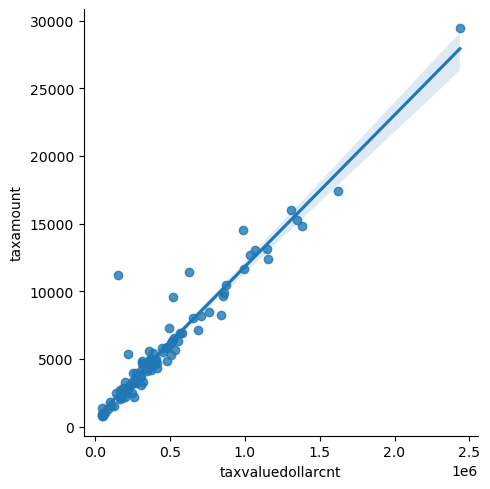

In [28]:
the_dict = {'continuous':['calculatedfinishedsquarefeet','taxvaluedollarcnt','taxamount','yearbuilt'],
           'catagorical':['bedroomcnt','bathroomcnt','fips']}
sns.lmplot('taxvaluedollarcnt', 'taxamount', train_subset, scatter=True, hue=None, col=None)

In [ ]:
the_dict = {'continuous':['calculatedfinishedsquarefeet','taxvaluedollarcnt','taxamount','yearbuilt'],
           'catagorical':['bedroomcnt','bathroomcnt','fips']}
greater_than_3 = train_subset['bedroomcnt'][train_subset['bedroomcnt'] > 3]
less_than_3 = train_subset['bedroomcnt'][train_subset['bedroomcnt'] <= 3]

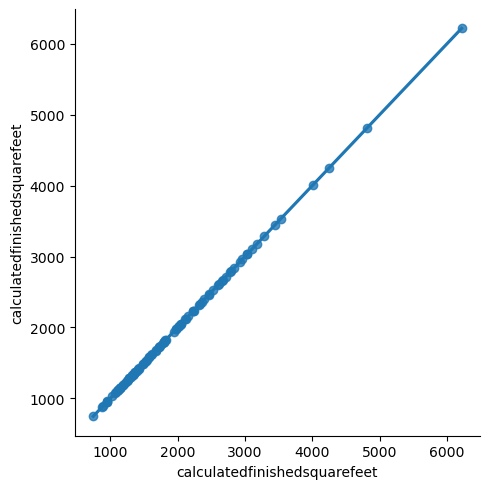

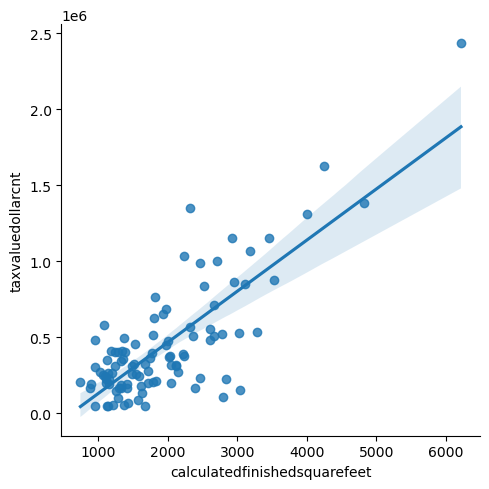

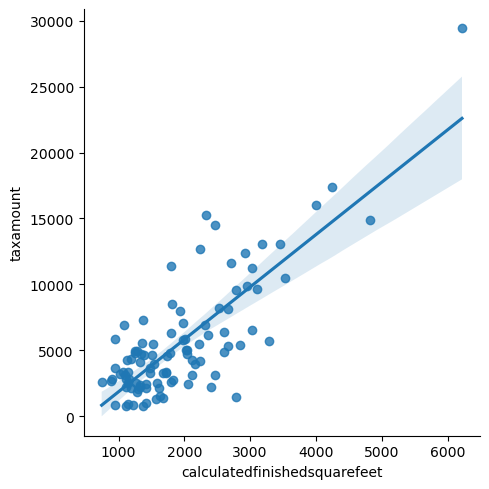

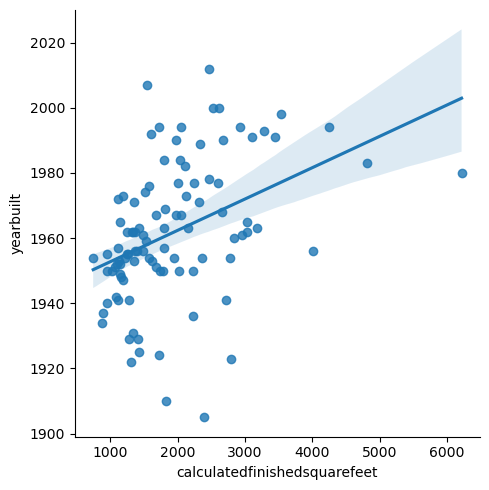

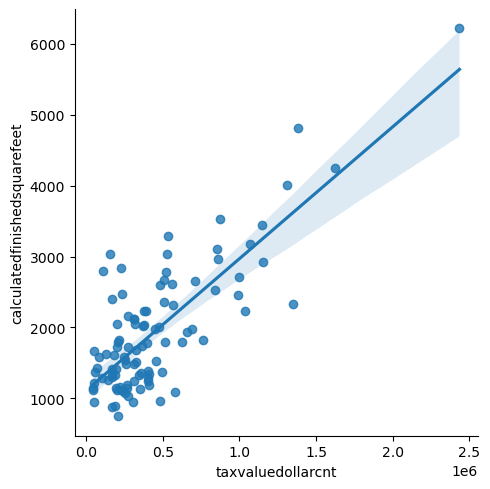

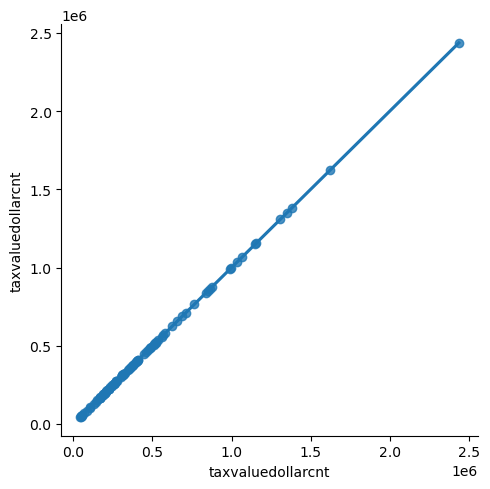

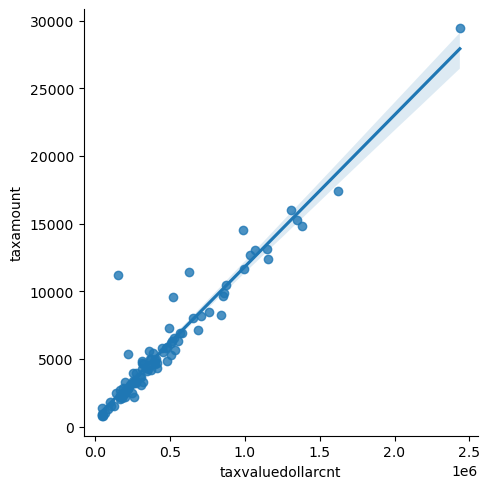

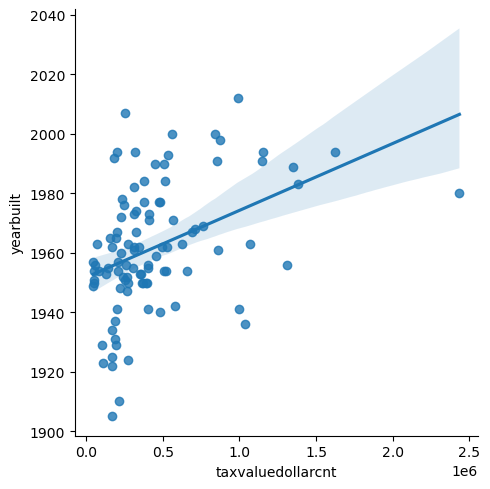

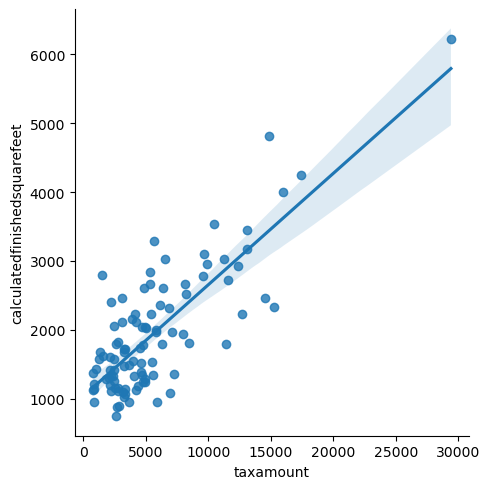

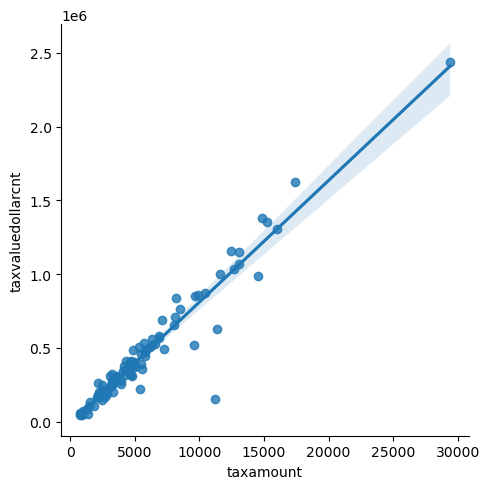

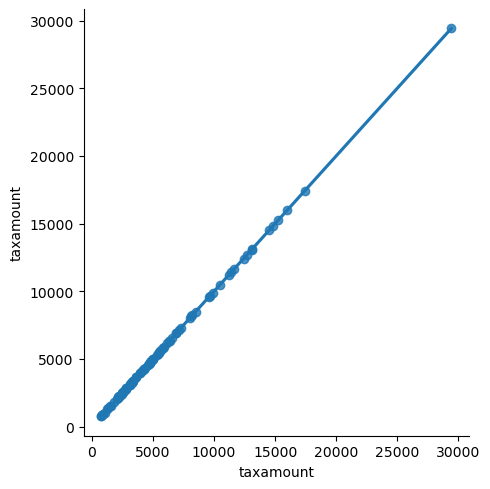

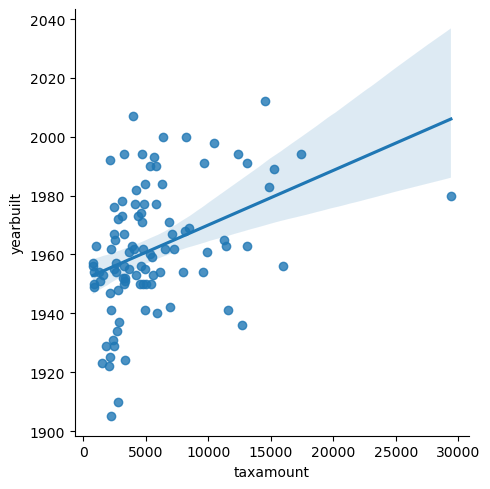

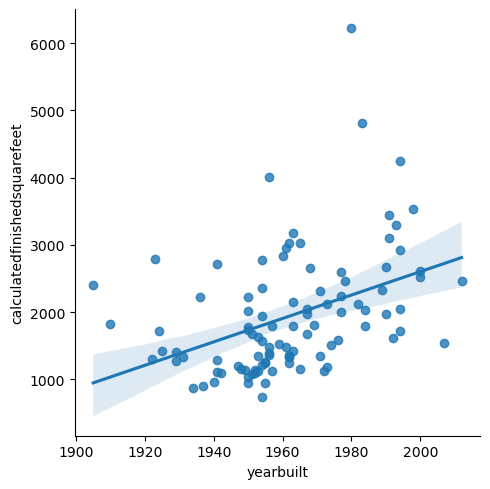

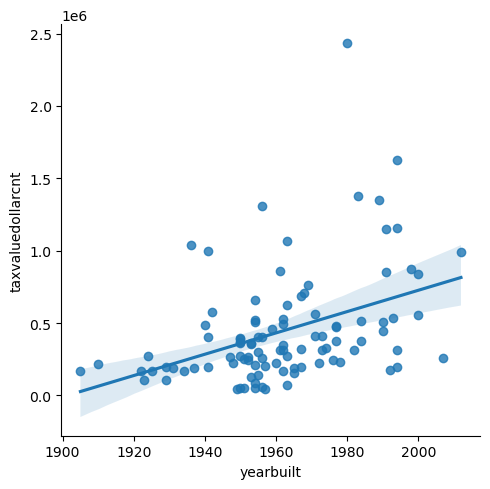

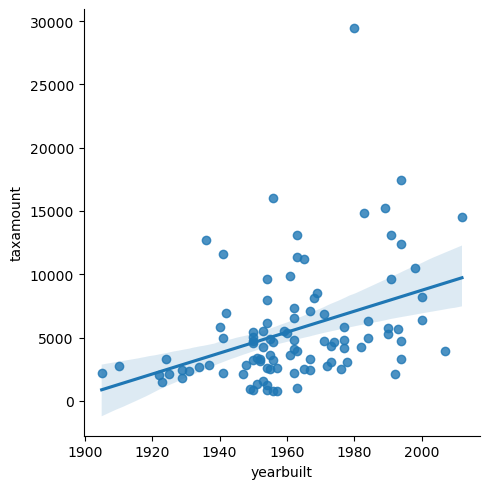

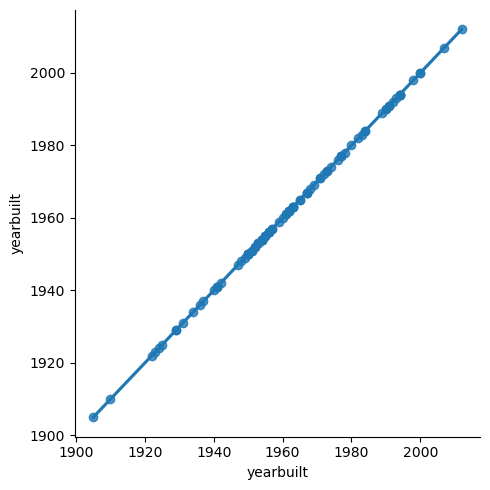

In [85]:
the_dict = {'continuous':['calculatedfinishedsquarefeet','taxvaluedollarcnt','taxamount','yearbuilt'],
           'catagorical':['bedroomcnt','bathroomcnt','fips']}

for i in the_dict['continuous']:
    for index, j in enumerate(the_dict['continuous']):
        
        ax = sns.lmplot(x = i, y =j, data =train_subset, scatter=True, hue=None, col=None)
        
        ax.set(xlabel=i, ylabel=j)
        plt.show()
        
        

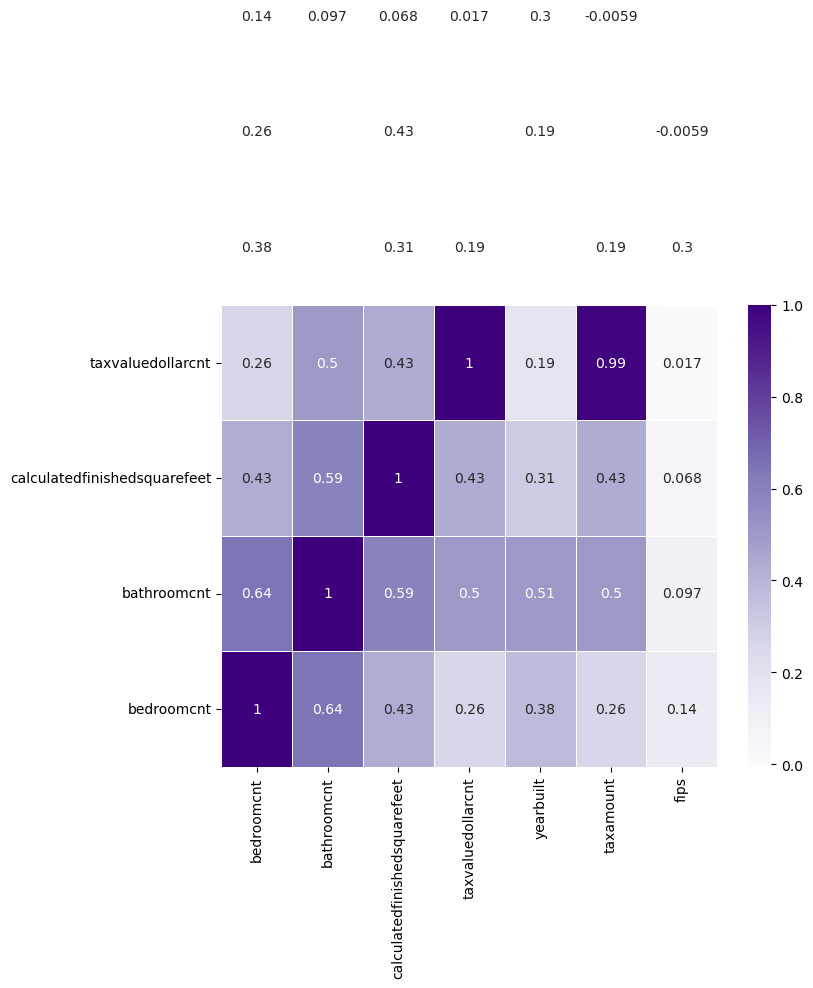

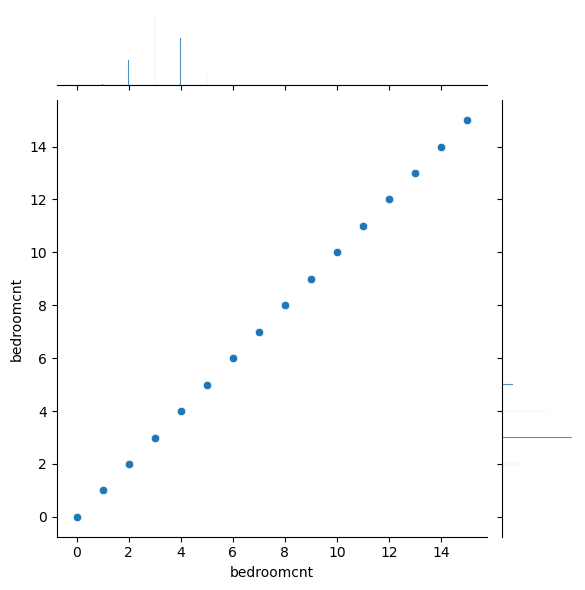

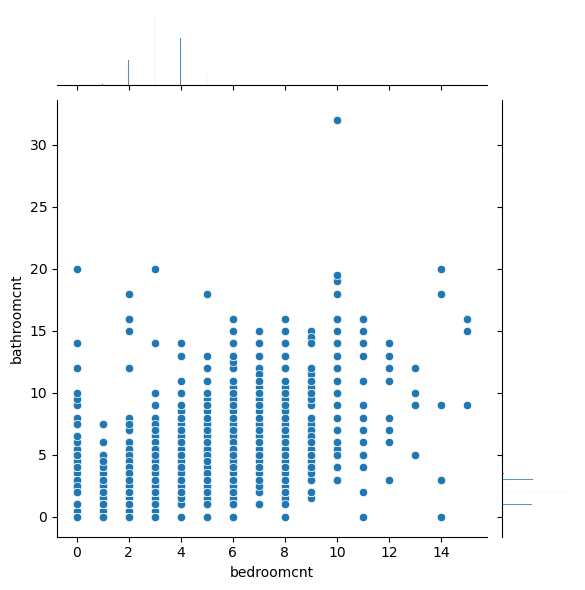

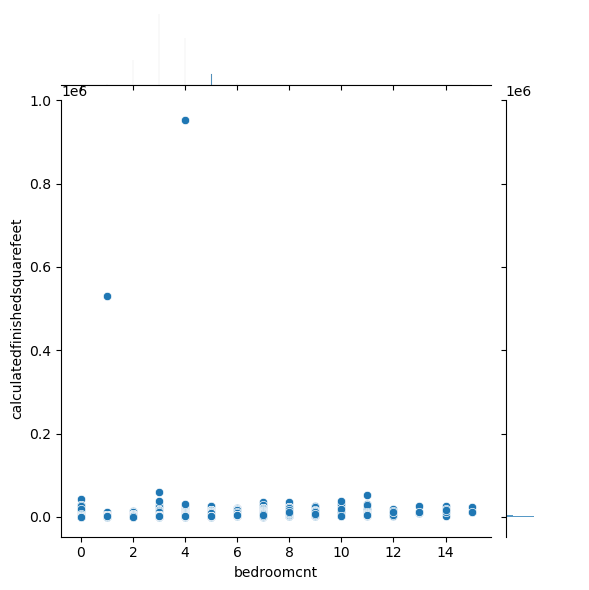

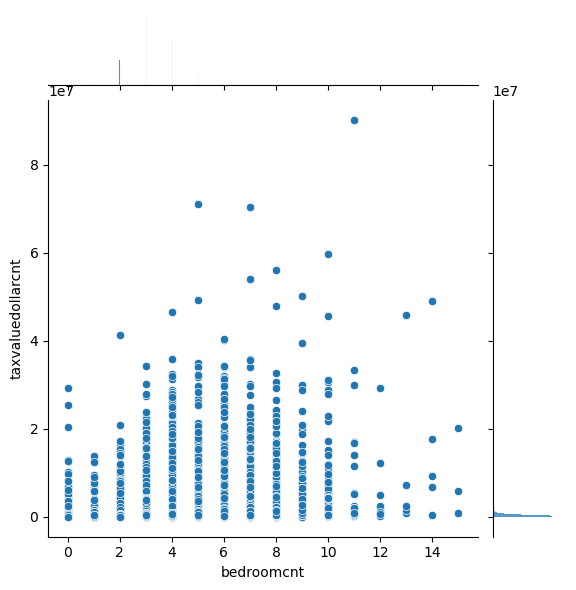

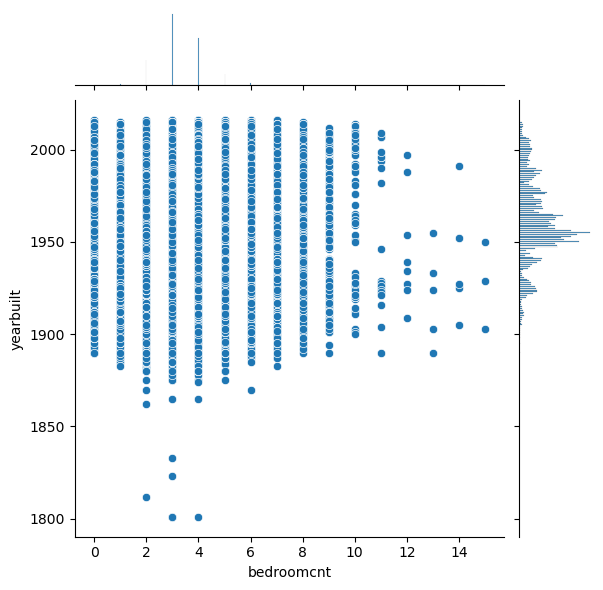

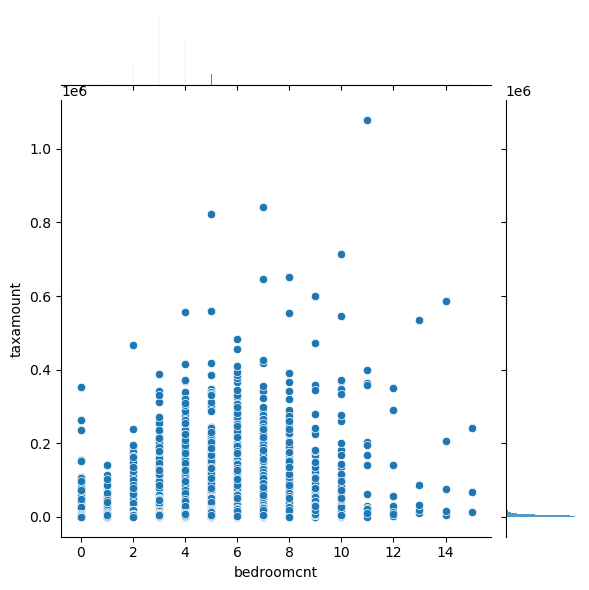

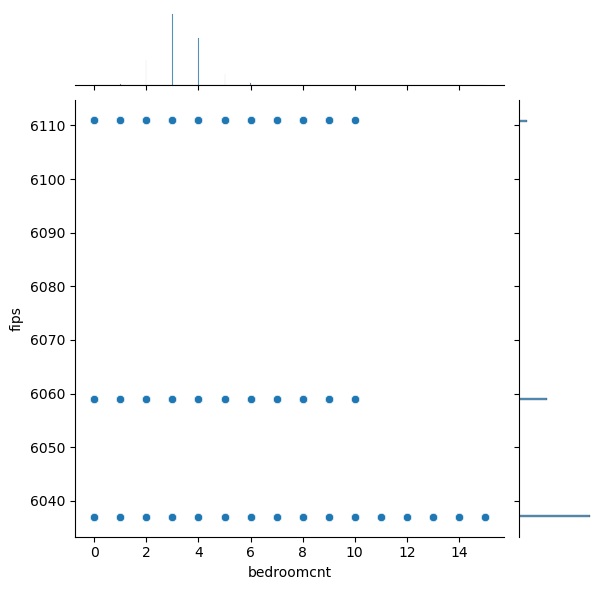

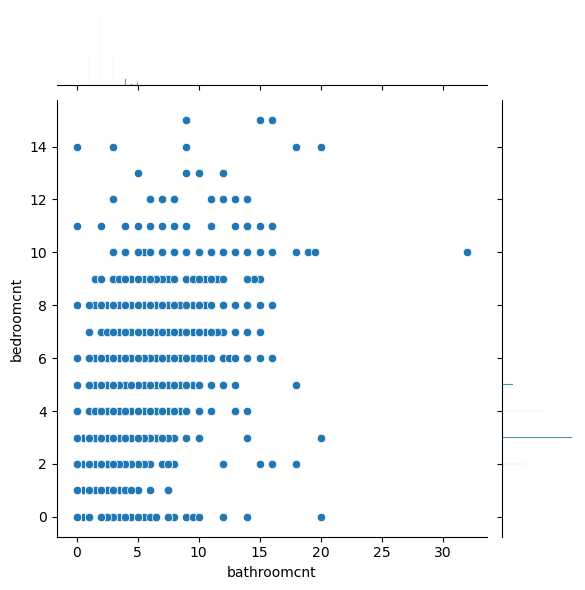

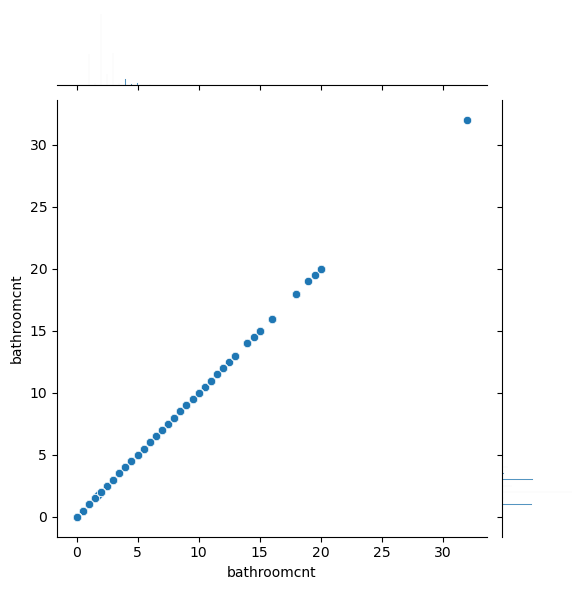

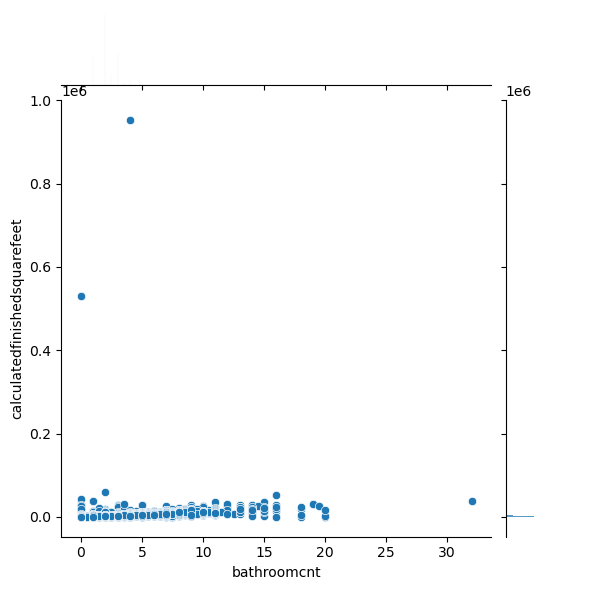

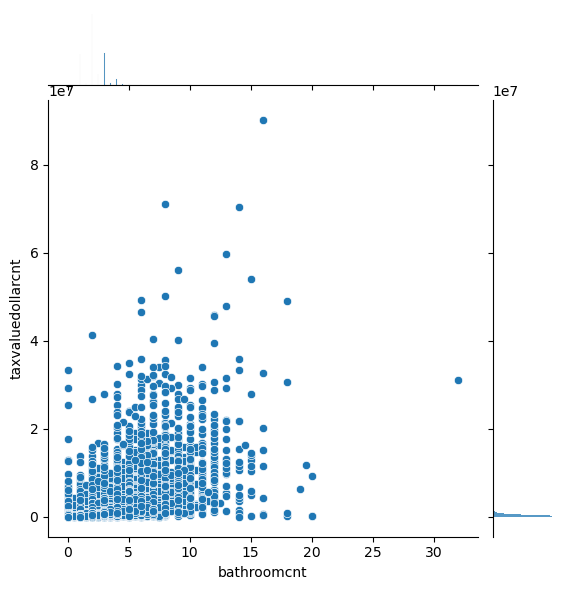

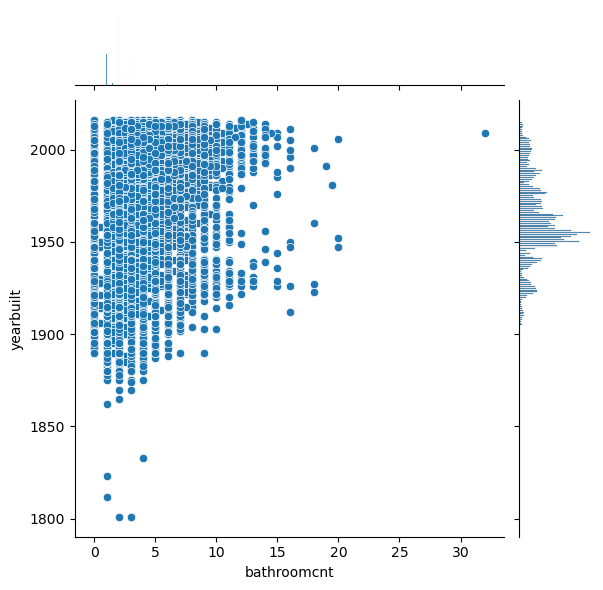

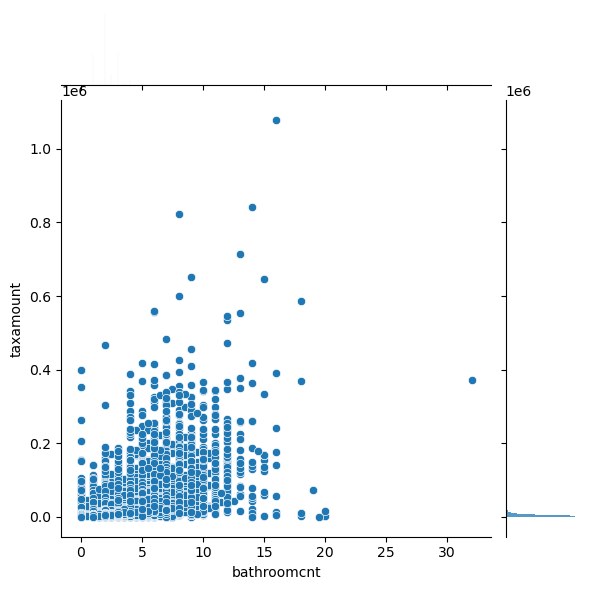

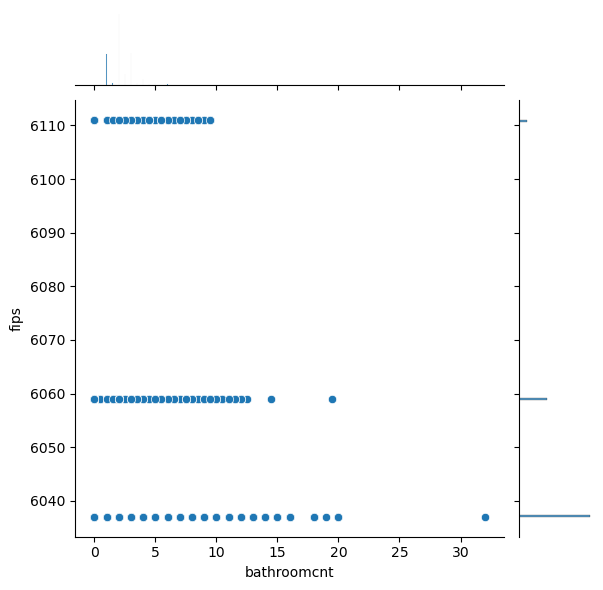

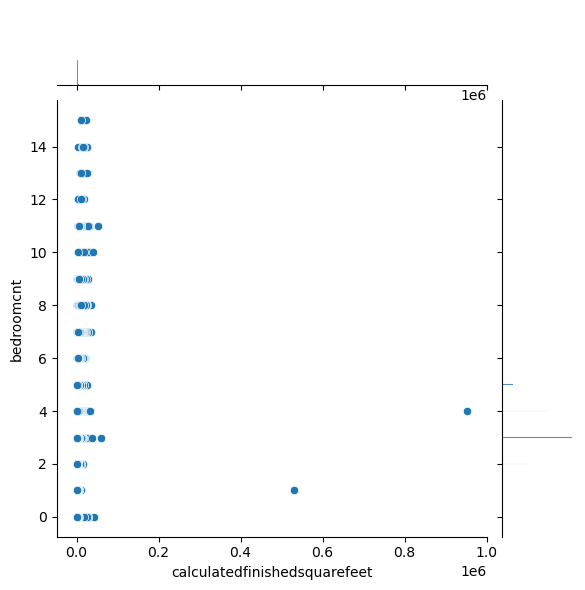

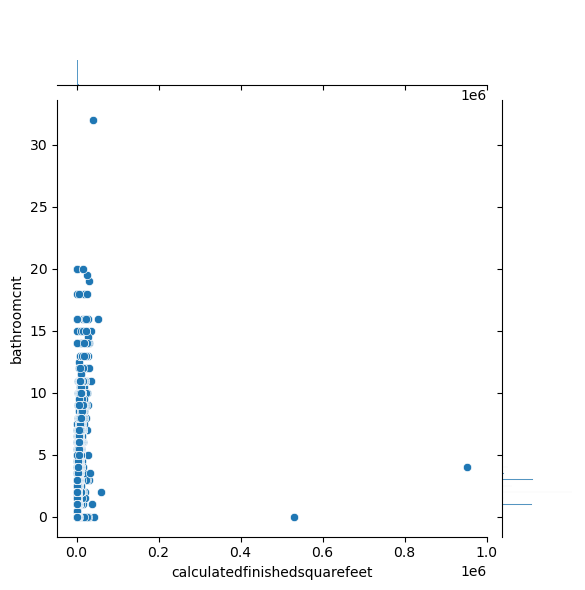

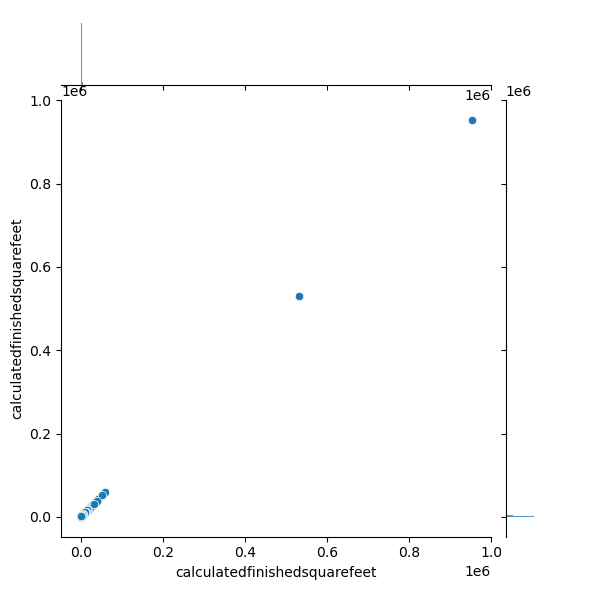

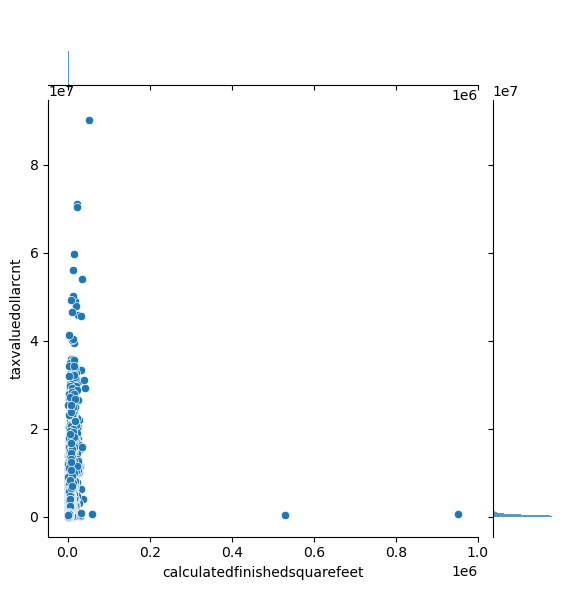

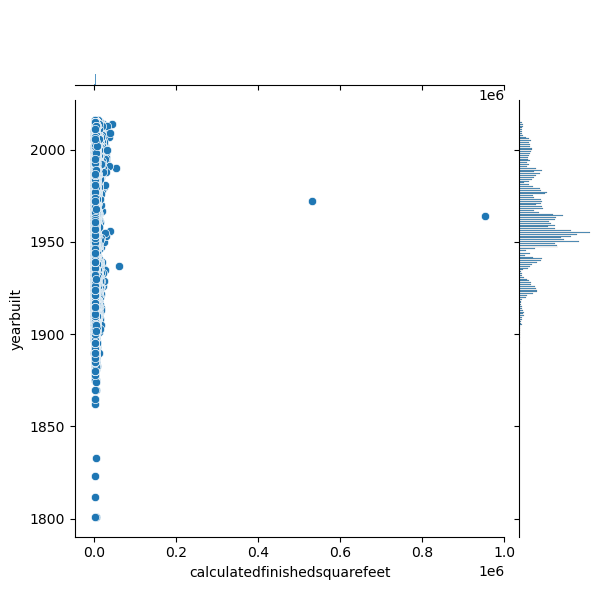

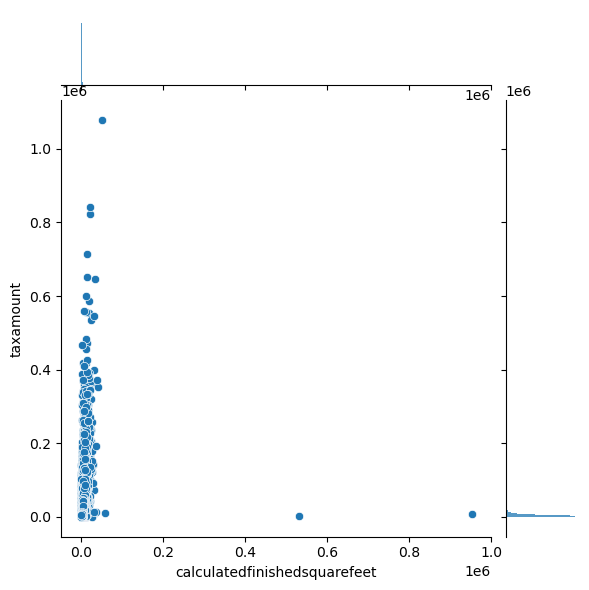

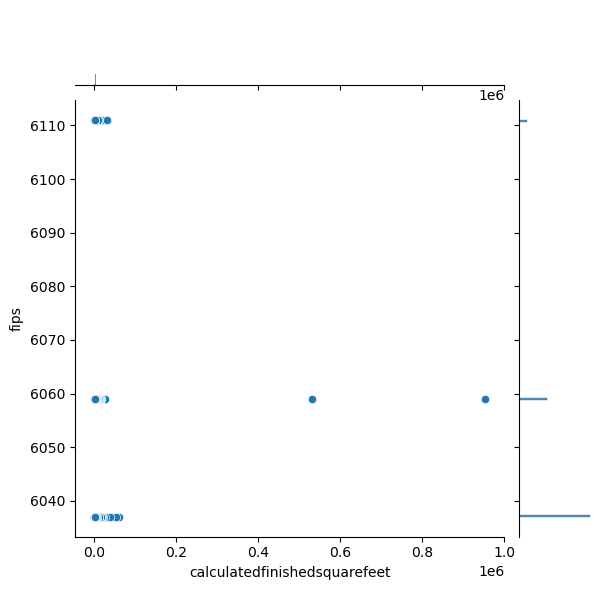

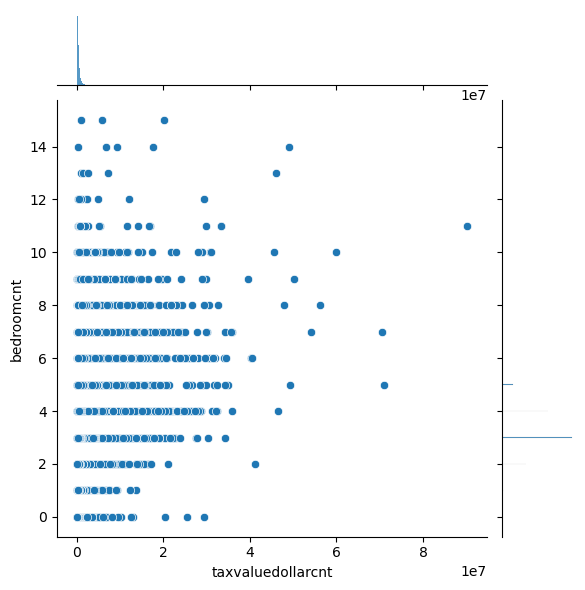

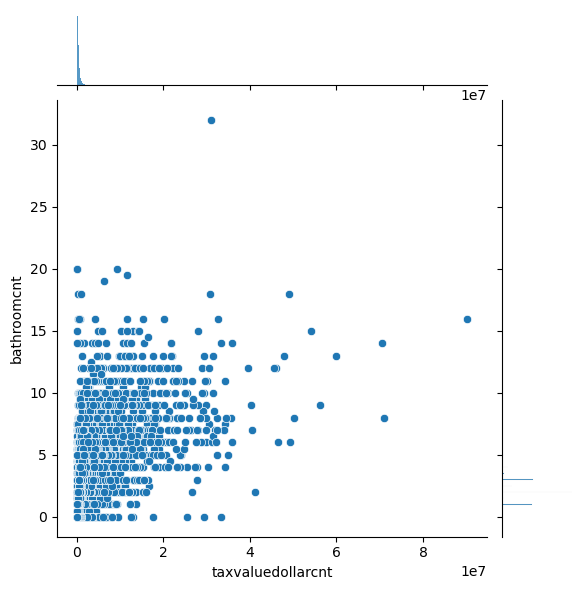

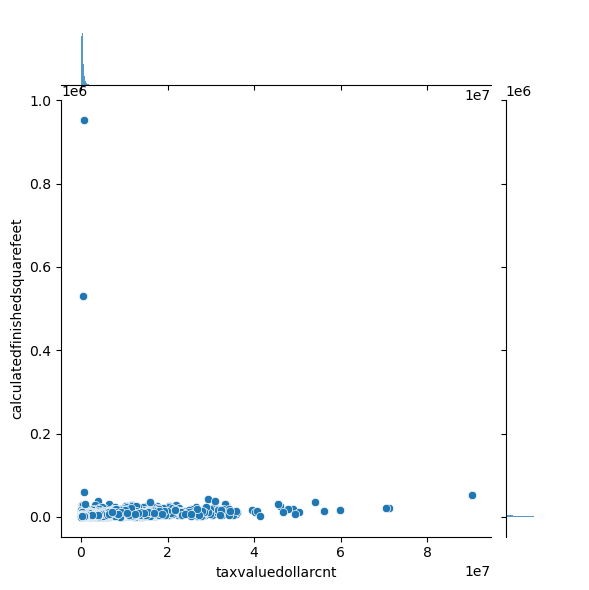

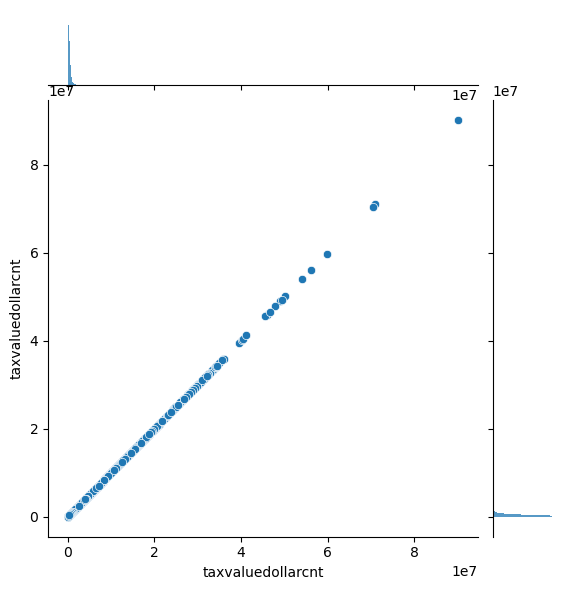

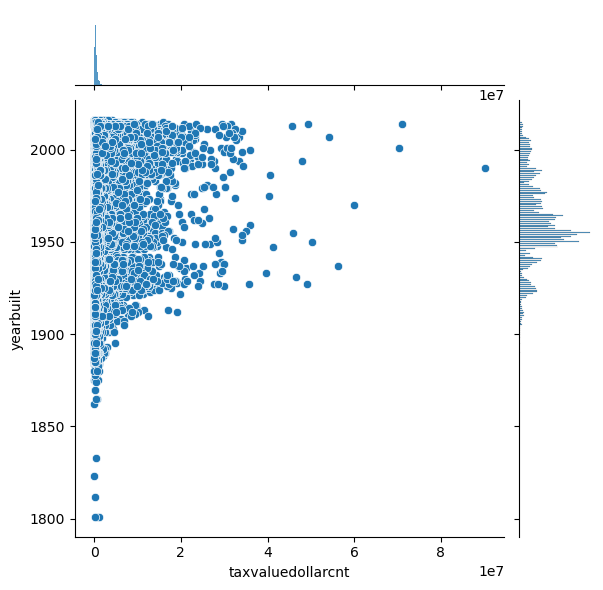

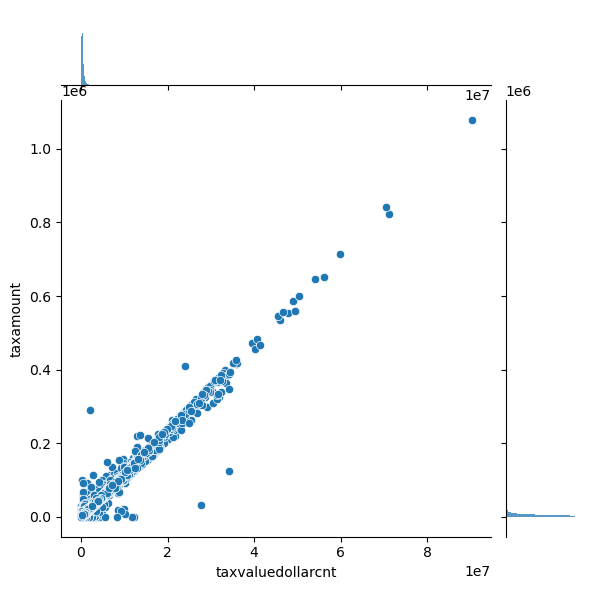

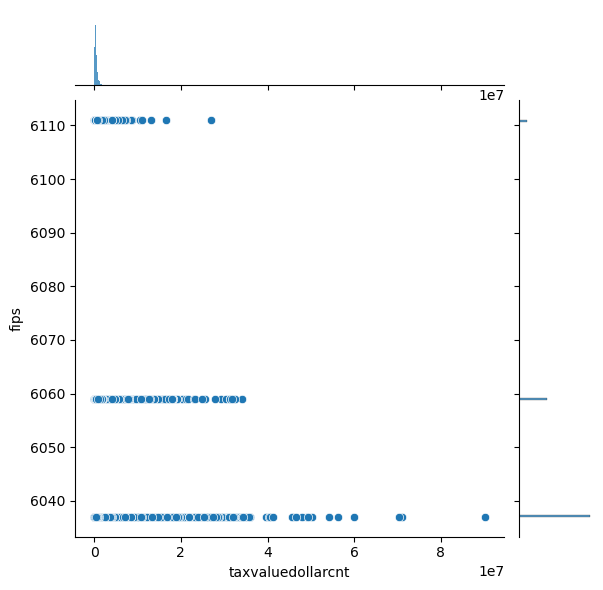

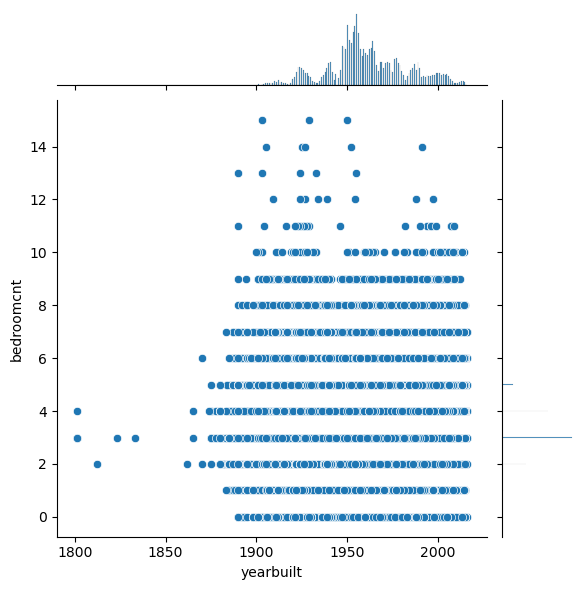

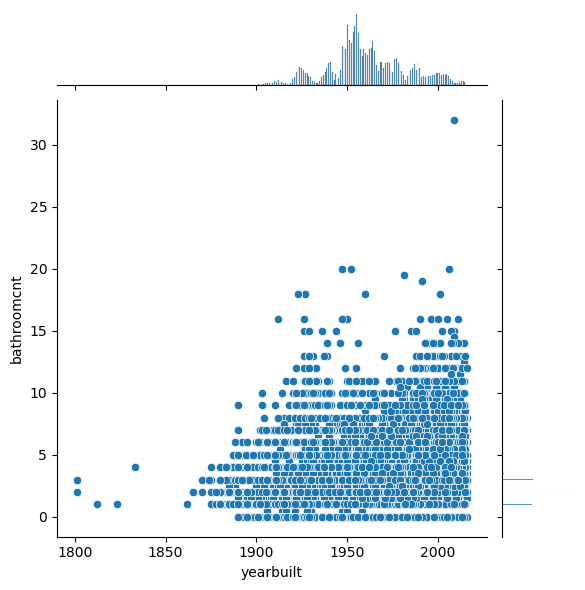

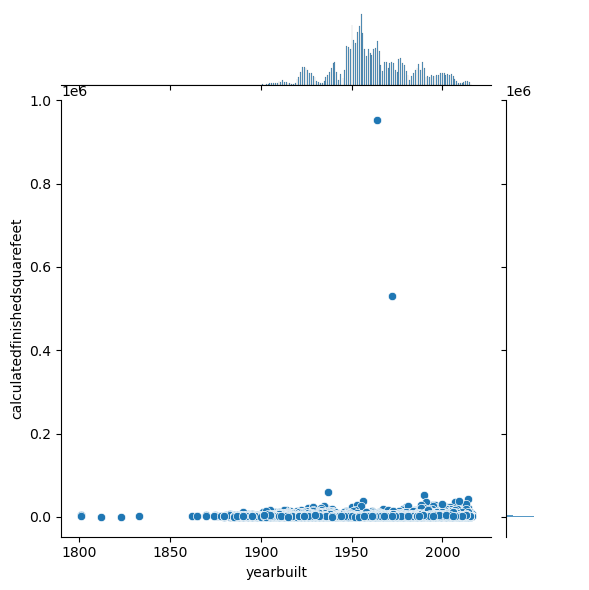

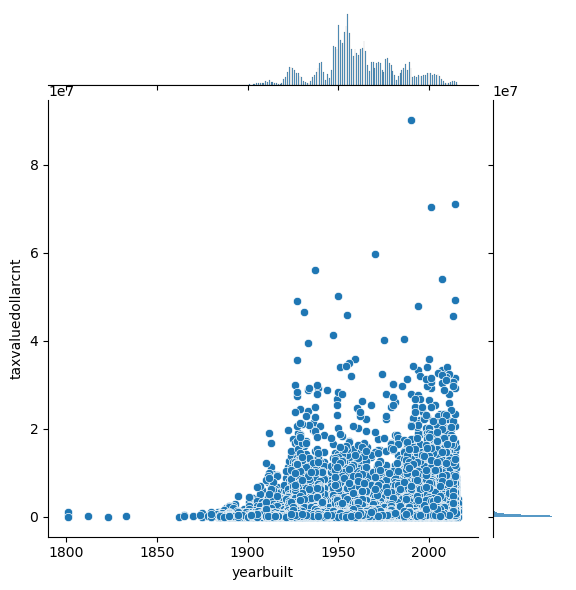

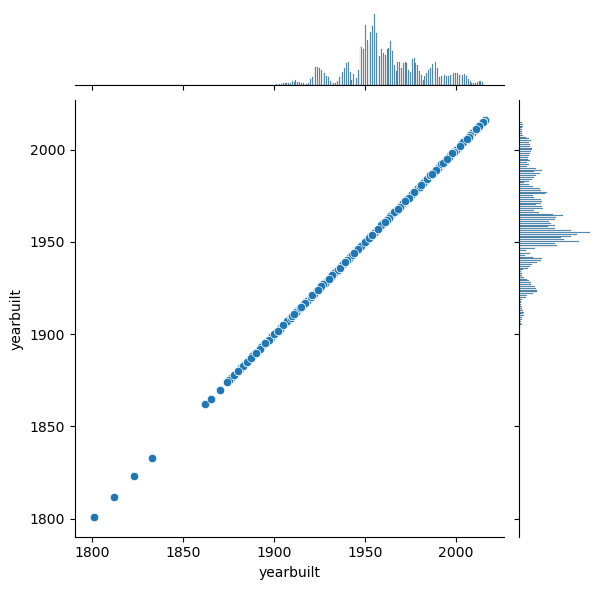

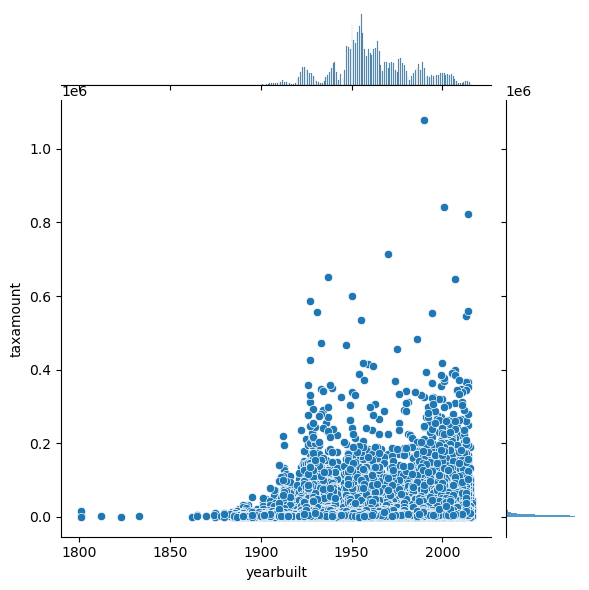

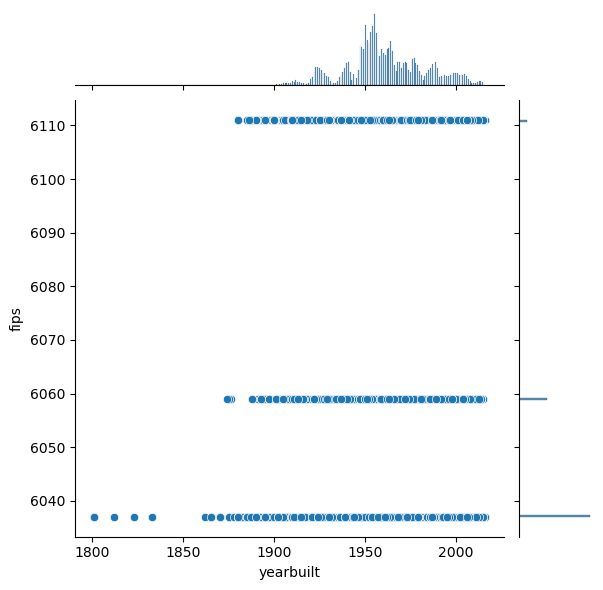

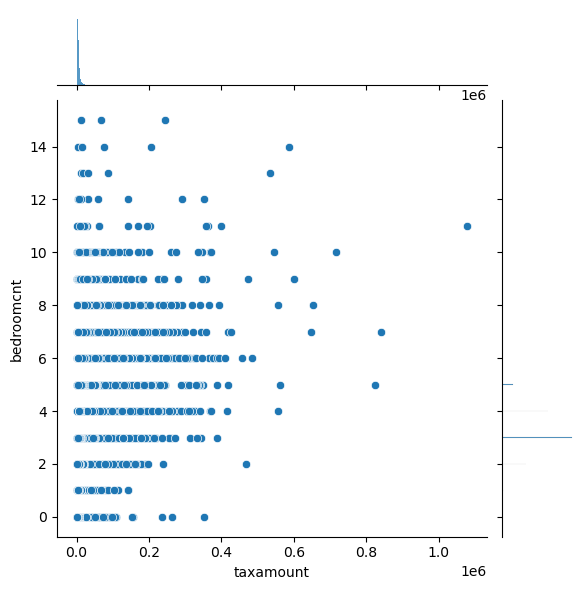

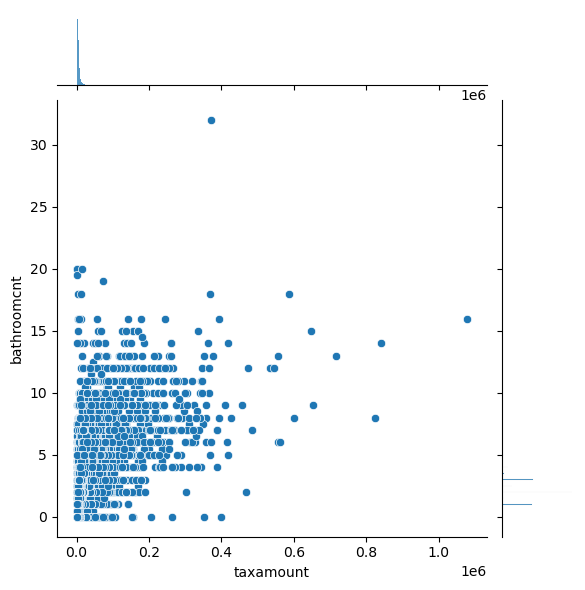

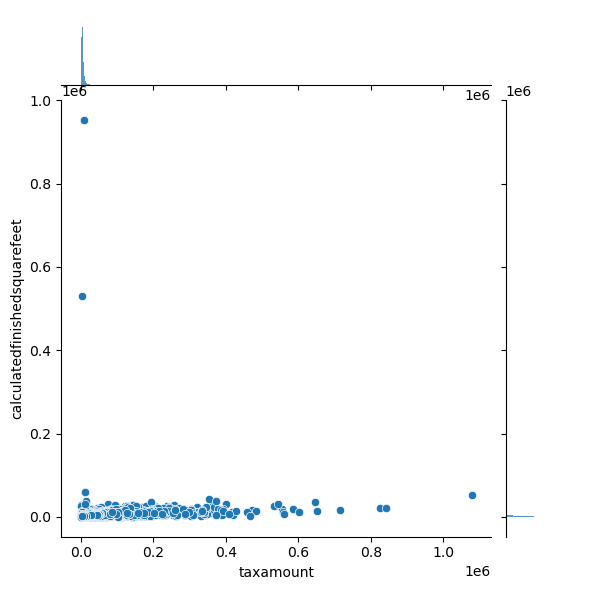

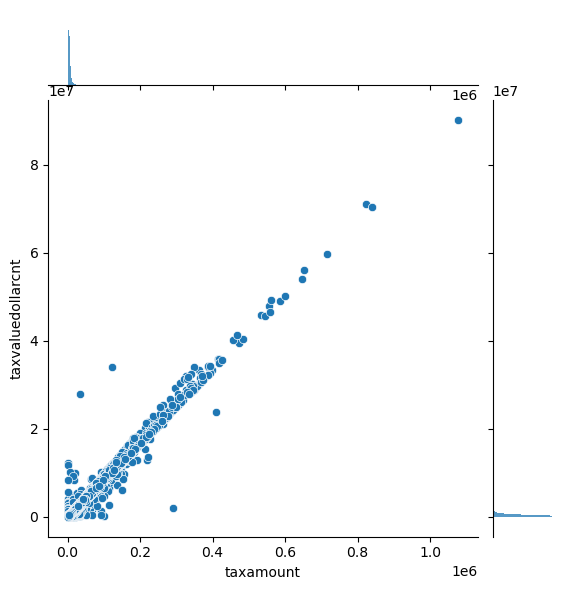

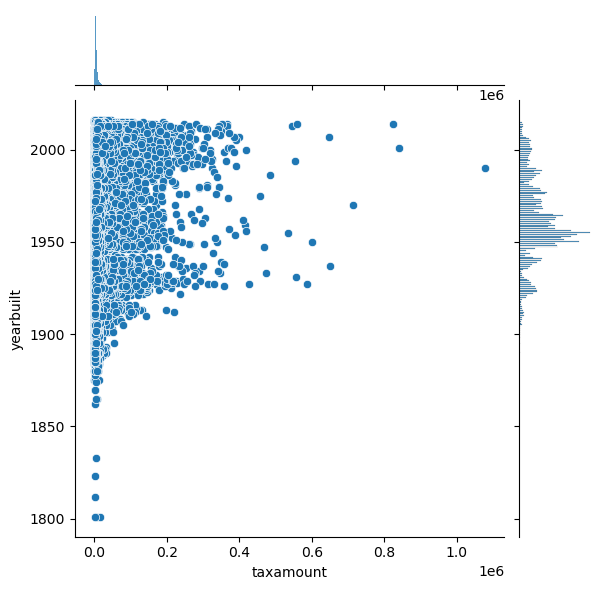

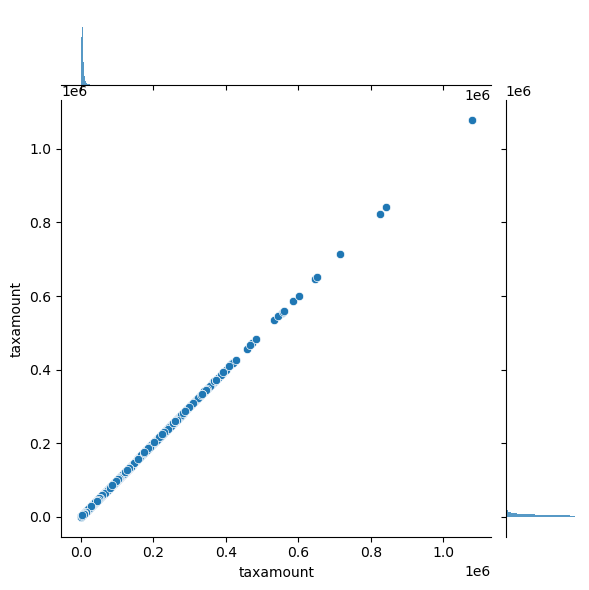

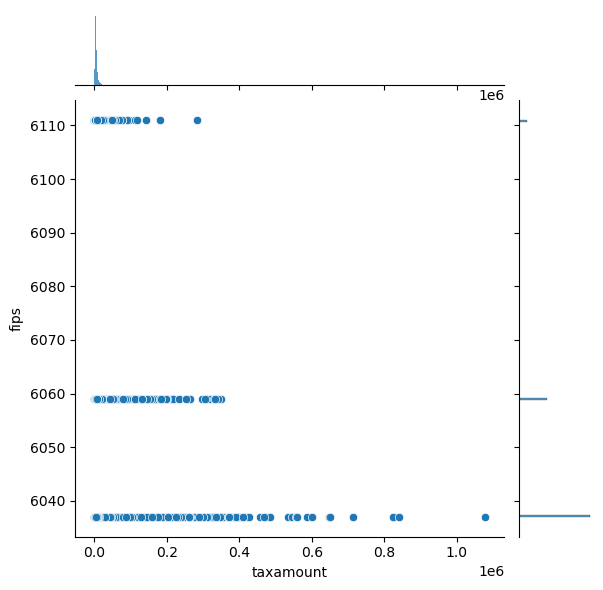

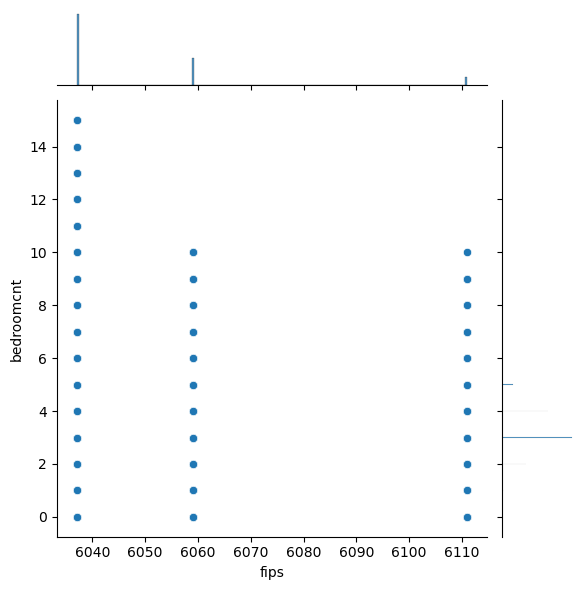

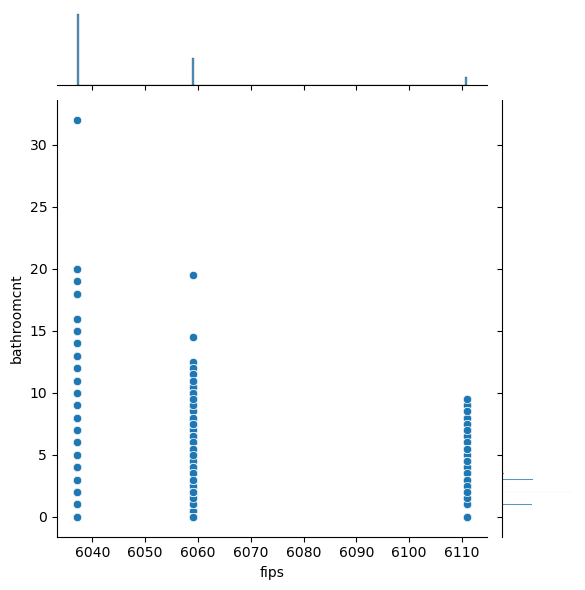

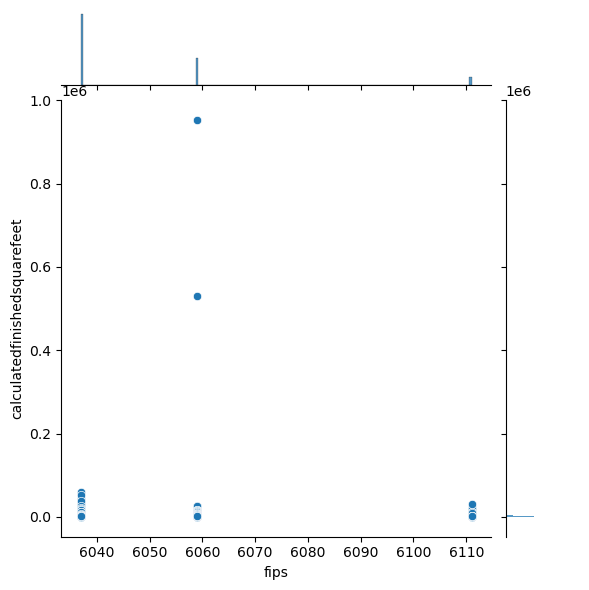

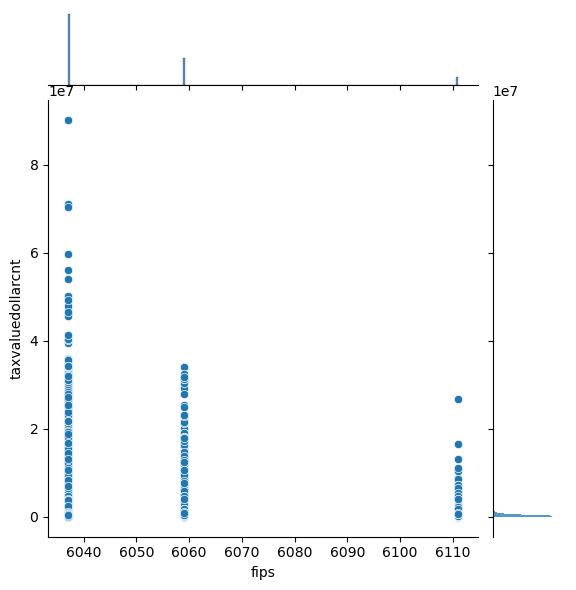

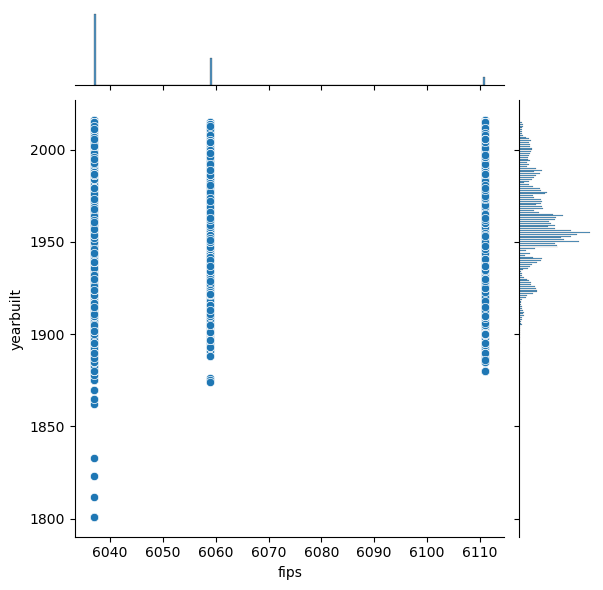

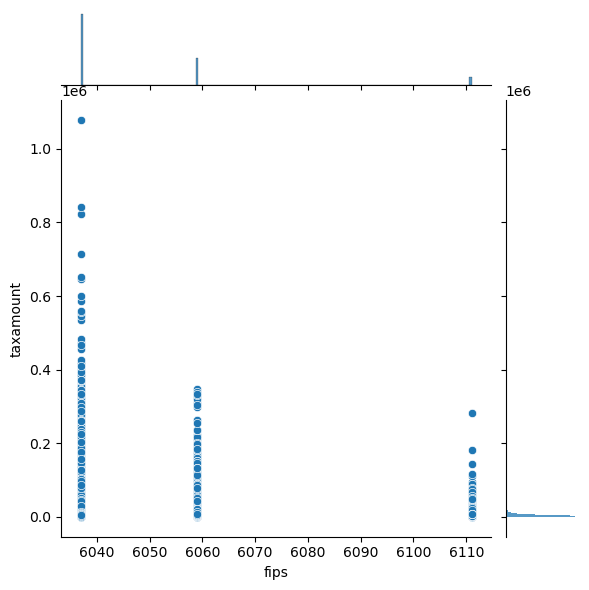

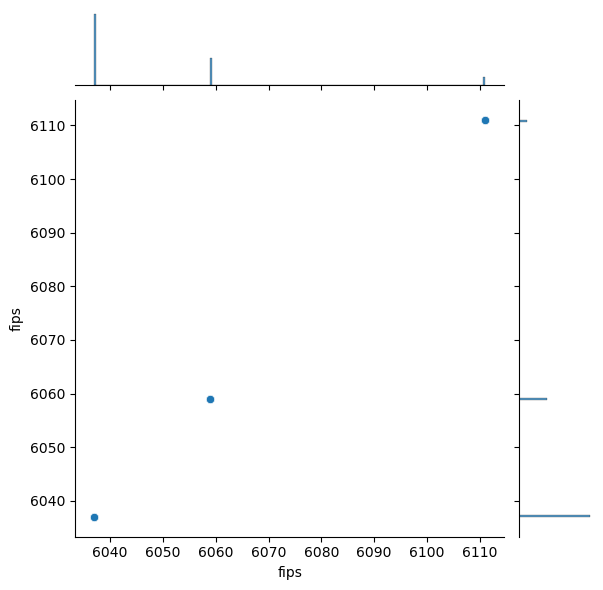

In [86]:
def plot_variable_pairs(train_subset):
    corr_train = train_subset.corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(corr_train, cmap='Purples', annot=True, linewidth = .5)
    plt.ylim(0,4)
    plt.show()
    for row, i in enumerate(train_subset.columns):
        for count, j in enumerate(train_subset.columns):
            sns.jointplot(x=train_subset[i],y=train_subset[j],data = train_subset, kind='scatter')
            plt.show()
    
plot_variable_pairs(train)